## Araba Fiyat Tahmin Modeli(Car Price Prediction Model)

**Veriyi Anlayalım(Understanding Data)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data=pd.read_csv("ilanlar.csv")
df=data.copy()
df.head()

,İlan No,İlan Tarihi,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,...,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
0,27502137,30 Aralık 2024,Renault,Symbol,1.5 dCi BlueDCI Joy,2018,150.000 km,Düz,Dizel,Sedan,...,1461 cc,90 hp,Önden Çekiş,İkinci El,"3,9 lt",50 lt,"1 değişen, 5 boyalı",Takasa Uygun,Galeriden,530.000 TL
1,27502169,30 Aralık 2024,Opel,Astra,1.6 Classic,2001,323.000 km,Düz,LPG & Benzin,Hatchback/5,...,1598 cc,75 hp,Önden Çekiş,İkinci El,"7,2 lt",52 lt,10 boyalı,Takasa Uygun Değil,Galeriden,319.000 TL
2,27314168,30 Aralık 2024,Toyota,Corolla,1.6 XEi,1997,390.000 km,Düz,LPG & Benzin,Sedan,...,1587 cc,105 hp,Önden Çekiş,İkinci El,NaN,50 lt,Belirtilmemiş,Takasa Uygun,Galeriden,295.000 TL
3,27314158,30 Aralık 2024,Renault,Megane,1.6 RXT,2001,408.000 km,Düz,LPG & Benzin,Sedan,...,1598 cc,107 hp,Önden Çekiş,İkinci El,7 lt,60 lt,Belirtilmemiş,Takasa Uygun,Galeriden,295.000 TL
4,27501437,30 Aralık 2024,Fiat,Egea,1.6 Multijet Easy,2023,72.651 km,Yarı Otomatik,Dizel,Sedan,...,1598 cc,120 hp,Önden Çekiş,İkinci El,"3,9 lt",45 lt,1 boyalı,Takasa Uygun,Galeriden,919.000 TL


In [4]:
df.shape #21 Feature,2500 gözlem birimimiz olduğunu göruyoruz

(2500, 21)

In [5]:
df.info() #"Feauture"larımızın bir çoğu object tipinde olduğundan burada encoding dönüşümümleri yapmamız gerekecek.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   İlan No              2500 non-null   int64 
 1   İlan Tarihi          2500 non-null   object
 2   Marka                2500 non-null   object
 3   Seri                 2500 non-null   object
 4   Model                2491 non-null   object
 5   Yıl                  2500 non-null   int64 
 6   Kilometre            2500 non-null   object
 7   Vites Tipi           2500 non-null   object
 8   Yakıt Tipi           2500 non-null   object
 9   Kasa Tipi            2498 non-null   object
 10  Renk                 2500 non-null   object
 11  Motor Hacmi          2464 non-null   object
 12  Motor Gücü           2463 non-null   object
 13  Çekiş                2471 non-null   object
 14  Araç Durumu          2491 non-null   object
 15  Ort. Yakıt Tüketimi  1844 non-null   object
 16  Yakıt 

In [6]:
for col in df.columns: 
    print(col,df[col].nunique())

İlan No 1901
İlan Tarihi 46
Marka 42
Seri 201
Model 822
Yıl 44
Kilometre 661
Vites Tipi 3
Yakıt Tipi 5
Kasa Tipi 9
Renk 23
Motor Hacmi 114
Motor Gücü 120
Çekiş 4
Araç Durumu 1
Ort. Yakıt Tüketimi 71
Yakıt Deposu 40
Boya-değişen 66
Takasa Uygun 3
Kimden 3
Fiyat 740


Şimdi burada bir sorun olduğunu fark ediyoruz. 2500 adet gözlem birimimiz varken 2500 adet farklı ilan numarası olması gerekir, fakat burada 1901 adet ilan numarası var. Bu bize veride gözlem tekrarı olduğunu gösteriyor, dolayısıyla tekrar eden gözlemlerden kurtulmamız gerekiyor.

***Veri Ön işleme(Data Preprocessing)***

In [7]:
df["İlan No"].value_counts()

İlan No
27502775    4
27502413    4
27502816    4
27503322    4
27502682    4
           ..
27378745    1
27378715    1
27378714    1
27378696    1
27498448    1
Name: count, Length: 1901, dtype: int64

In [8]:
df=df.drop_duplicates(subset="İlan No")

In [9]:
df["İlan No"].value_counts()

İlan No
27377214    1
27502137    1
27502169    1
27314168    1
27314158    1
           ..
27473573    1
27498739    1
27498868    1
27498486    1
27498448    1
Name: count, Length: 1901, dtype: int64

In [10]:
df["İlan No"].value_counts().max() 

np.int64(1)

In [11]:
df["İlan No"].nunique()

1901

In [12]:
len(df)

1901

Böylelikle tekrar eden gözlem problemini çözmüş olduk.

In [13]:
for col in df.columns: #Gereksiz Feautureları belirleyip silelim.
    print(col,df[col].nunique())

İlan No 1901
İlan Tarihi 46
Marka 42
Seri 201
Model 822
Yıl 44
Kilometre 661
Vites Tipi 3
Yakıt Tipi 5
Kasa Tipi 9
Renk 23
Motor Hacmi 114
Motor Gücü 120
Çekiş 4
Araç Durumu 1
Ort. Yakıt Tüketimi 71
Yakıt Deposu 40
Boya-değişen 66
Takasa Uygun 3
Kimden 3
Fiyat 739


In [14]:
df["Kimden"].value_counts() #Durabilir 

Kimden
Galeriden          1261
Sahibinden          634
Yetkili Bayiden       6
Name: count, dtype: int64

In [15]:
df["Takasa Uygun"].value_counts() #Frekanslarından bağımsız, işe yarayacak bir feauture olduğunu düşünmüyorum fakat yine de görselleştirip 
                                  #bakmakta fayda var. O yüzden şimdilik dursun.

Takasa Uygun
Takasa Uygun          1015
Takasa Uygun Değil     485
-                        7
Name: count, dtype: int64

In [16]:
df.drop(columns=['İlan No','İlan Tarihi','Araç Durumu'],inplace=True)

In [17]:
df.head()

,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
0,Renault,Symbol,1.5 dCi BlueDCI Joy,2018,150.000 km,Düz,Dizel,Sedan,Beyaz,1461 cc,90 hp,Önden Çekiş,"3,9 lt",50 lt,"1 değişen, 5 boyalı",Takasa Uygun,Galeriden,530.000 TL
1,Opel,Astra,1.6 Classic,2001,323.000 km,Düz,LPG & Benzin,Hatchback/5,Siyah,1598 cc,75 hp,Önden Çekiş,"7,2 lt",52 lt,10 boyalı,Takasa Uygun Değil,Galeriden,319.000 TL
2,Toyota,Corolla,1.6 XEi,1997,390.000 km,Düz,LPG & Benzin,Sedan,Gri (Gümüş),1587 cc,105 hp,Önden Çekiş,NaN,50 lt,Belirtilmemiş,Takasa Uygun,Galeriden,295.000 TL
3,Renault,Megane,1.6 RXT,2001,408.000 km,Düz,LPG & Benzin,Sedan,Bordo,1598 cc,107 hp,Önden Çekiş,7 lt,60 lt,Belirtilmemiş,Takasa Uygun,Galeriden,295.000 TL
4,Fiat,Egea,1.6 Multijet Easy,2023,72.651 km,Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,120 hp,Önden Çekiş,"3,9 lt",45 lt,1 boyalı,Takasa Uygun,Galeriden,919.000 TL


*****Özellik Mühendisliği (Feauture Engineering)*****

Yukarıda,veri setini incelediğimiz kısımda, verilerin çoğunun object tipinde olduğunu gördük ve bunu istemiyoruz.
Çünkü bizim bazı değişkenleri kategorik değil, numerik olarak almamız gerekecek bu yüzden gerekli tip dönüşümlerini yapalım.

In [18]:
df["Kilometre"]=df["Kilometre"].str.replace("km","").str.strip()
df["Ort. Yakıt Tüketimi"]=df["Ort. Yakıt Tüketimi"].str.replace("lt","").str.strip()
df["Yakıt Deposu"]=df["Yakıt Deposu"].str.replace("lt","").str.strip()

In [19]:
df["Kilometre"]=df["Kilometre"].str.replace(".","").str.strip()
df["Ort. Yakıt Tüketimi"]=df["Ort. Yakıt Tüketimi"].str.replace(",",".")
df["Yakıt Deposu"]=df["Yakıt Deposu"].str.replace(",",".")

In [20]:
df["Kilometre"]=df["Kilometre"].astype(float)
df["Ort. Yakıt Tüketimi"]=df["Ort. Yakıt Tüketimi"].astype(float)
df["Yakıt Deposu"]=df["Yakıt Deposu"].astype(float)

In [21]:
df.dtypes

Marka                   object
Seri                    object
Model                   object
Yıl                      int64
Kilometre              float64
Vites Tipi              object
Yakıt Tipi              object
Kasa Tipi               object
Renk                    object
Motor Hacmi             object
Motor Gücü              object
Çekiş                   object
Ort. Yakıt Tüketimi    float64
Yakıt Deposu           float64
Boya-değişen            object
Takasa Uygun            object
Kimden                  object
Fiyat                   object
dtype: object

In [22]:
df["Fiyat"]=df["Fiyat"].str.replace("TL","").str.strip()
df["Fiyat"]=df["Fiyat"].str.replace(".","")
df["Fiyat"]=df["Fiyat"].astype(float)

In [23]:
df["Kilometre"][0]

np.float64(150000.0)

In [24]:
df.dtypes

Marka                   object
Seri                    object
Model                   object
Yıl                      int64
Kilometre              float64
Vites Tipi              object
Yakıt Tipi              object
Kasa Tipi               object
Renk                    object
Motor Hacmi             object
Motor Gücü              object
Çekiş                   object
Ort. Yakıt Tüketimi    float64
Yakıt Deposu           float64
Boya-değişen            object
Takasa Uygun            object
Kimden                  object
Fiyat                  float64
dtype: object

In [25]:
df["Fiyat"][0]

np.float64(530000.0)

In [26]:
df["Ort. Yakıt Tüketimi"][0]

np.float64(3.9)

In [27]:
df["Yakıt Deposu"][0]

np.float64(50.0)

In [28]:
yas=df["Yıl"].transform(lambda x: 2025-x)
yas

0        7
1       24
2       28
3       24
4        2
        ..
2495    10
2496     5
2497    37
2498    19
2499    11
Name: Yıl, Length: 1901, dtype: int64

In [29]:
df.insert(3,'Yaş',yas)
df.head()

,Marka,Seri,Model,Yaş,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
0,Renault,Symbol,1.5 dCi BlueDCI Joy,7,2018,150000.0,Düz,Dizel,Sedan,Beyaz,1461 cc,90 hp,Önden Çekiş,3.9,50.0,"1 değişen, 5 boyalı",Takasa Uygun,Galeriden,530000.0
1,Opel,Astra,1.6 Classic,24,2001,323000.0,Düz,LPG & Benzin,Hatchback/5,Siyah,1598 cc,75 hp,Önden Çekiş,7.2,52.0,10 boyalı,Takasa Uygun Değil,Galeriden,319000.0
2,Toyota,Corolla,1.6 XEi,28,1997,390000.0,Düz,LPG & Benzin,Sedan,Gri (Gümüş),1587 cc,105 hp,Önden Çekiş,NaN,50.0,Belirtilmemiş,Takasa Uygun,Galeriden,295000.0
3,Renault,Megane,1.6 RXT,24,2001,408000.0,Düz,LPG & Benzin,Sedan,Bordo,1598 cc,107 hp,Önden Çekiş,7.0,60.0,Belirtilmemiş,Takasa Uygun,Galeriden,295000.0
4,Fiat,Egea,1.6 Multijet Easy,2,2023,72651.0,Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,120 hp,Önden Çekiş,3.9,45.0,1 boyalı,Takasa Uygun,Galeriden,919000.0


In [30]:
df.drop(columns="Yıl",axis=1, inplace=True)
df.head()

,Marka,Seri,Model,Yaş,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
0,Renault,Symbol,1.5 dCi BlueDCI Joy,7,150000.0,Düz,Dizel,Sedan,Beyaz,1461 cc,90 hp,Önden Çekiş,3.9,50.0,"1 değişen, 5 boyalı",Takasa Uygun,Galeriden,530000.0
1,Opel,Astra,1.6 Classic,24,323000.0,Düz,LPG & Benzin,Hatchback/5,Siyah,1598 cc,75 hp,Önden Çekiş,7.2,52.0,10 boyalı,Takasa Uygun Değil,Galeriden,319000.0
2,Toyota,Corolla,1.6 XEi,28,390000.0,Düz,LPG & Benzin,Sedan,Gri (Gümüş),1587 cc,105 hp,Önden Çekiş,NaN,50.0,Belirtilmemiş,Takasa Uygun,Galeriden,295000.0
3,Renault,Megane,1.6 RXT,24,408000.0,Düz,LPG & Benzin,Sedan,Bordo,1598 cc,107 hp,Önden Çekiş,7.0,60.0,Belirtilmemiş,Takasa Uygun,Galeriden,295000.0
4,Fiat,Egea,1.6 Multijet Easy,2,72651.0,Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,120 hp,Önden Çekiş,3.9,45.0,1 boyalı,Takasa Uygun,Galeriden,919000.0


In [31]:
df.tail()

,Marka,Seri,Model,Yaş,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
2495,BMW,5 Serisi,520i Executive,10,152000.0,Otomatik,Benzin,Sedan,Beyaz,1592 cc,170 hp,Arkadan İtiş,6.7,70.0,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden,1279900.0
2496,Opel,Insignia,1.5 d Elegance,5,82000.0,Otomatik,Dizel,Hatchback/5,Kahverengi,1496 cc,122 hp,Önden Çekiş,4.3,62.0,Belirtilmemiş,Takasa Uygun,Galeriden,1345000.0
2497,Mercedes - Benz,300,D,37,461000.0,Otomatik,Dizel,Sedan,Gri,2501 - 3000 cm3,126 - 150 HP,Arkadan İtiş,NaN,NaN,Tamamı orjinal,Takasa Uygun Değil,Galeriden,369000.0
2498,Mazda,3,1.6 Comfort,19,149800.0,Otomatik,Benzin,Sedan,Gri,1598 cc,105 hp,Önden Çekiş,7.8,55.0,Belirtilmemiş,Takasa Uygun Değil,Galeriden,539000.0
2499,BMW,3 Serisi,320i ED Standart,11,213000.0,Otomatik,Benzin,Sedan,Beyaz,1598 cc,170 hp,Arkadan İtiş,5.4,60.0,1 boyalı,Takasa Uygun Değil,Galeriden,965900.0


Motor Hacmi ve Motor Gücü değişkenlerinde bazı gözlem birimlerinde değer aralığı girilmiş bu sebeple ortalamalarını kabul edeceğiz.

In [32]:
df["Motor Hacmi"]=df["Motor Hacmi"].str.replace("cc","").str.replace("cm3","").str.strip()
df.tail()

,Marka,Seri,Model,Yaş,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
2495,BMW,5 Serisi,520i Executive,10,152000.0,Otomatik,Benzin,Sedan,Beyaz,1592,170 hp,Arkadan İtiş,6.7,70.0,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden,1279900.0
2496,Opel,Insignia,1.5 d Elegance,5,82000.0,Otomatik,Dizel,Hatchback/5,Kahverengi,1496,122 hp,Önden Çekiş,4.3,62.0,Belirtilmemiş,Takasa Uygun,Galeriden,1345000.0
2497,Mercedes - Benz,300,D,37,461000.0,Otomatik,Dizel,Sedan,Gri,2501 - 3000,126 - 150 HP,Arkadan İtiş,NaN,NaN,Tamamı orjinal,Takasa Uygun Değil,Galeriden,369000.0
2498,Mazda,3,1.6 Comfort,19,149800.0,Otomatik,Benzin,Sedan,Gri,1598,105 hp,Önden Çekiş,7.8,55.0,Belirtilmemiş,Takasa Uygun Değil,Galeriden,539000.0
2499,BMW,3 Serisi,320i ED Standart,11,213000.0,Otomatik,Benzin,Sedan,Beyaz,1598,170 hp,Arkadan İtiş,5.4,60.0,1 boyalı,Takasa Uygun Değil,Galeriden,965900.0


In [33]:
df["Motor Hacmi"].unique()

array(['1461', '1598', '1587', '1248', '1390', '1581', '1401 - 1600',
       '1201 - 1400', '999', '1399', '1395', '1995', '1596', '1496',
       '1984', '1368', '1197', '1500', '1242', '1798', '1499', '1199',
       '1329', '1198', '1801 - 2000', '1560', '1397', '1364', '1582',
       '1968', '1599', '1332', '1396', '1498', '1149', '1597', '1998',
       '1497', '1422', '1991', '1590', '1400', nan, '1601 - 1800', '898',
       '1997', '1595', '1796', "1200 ' e kadar", '1398', '1493', '1298',
       '2501 - 3000', '1388', '2001 - 2500', '1896', '3800', '1600',
       '2148', '2996', '1753', '2976', '1360', '-', '998', '1341', '2300',
       '2143', '1988', '1372', '1799', '1840', '1781', '3498', '1339',
       '1576', '2967', '1296', '1580', '1124', '1910', '7993', '1468',
       '2171', '1591', '1289', '1589', '2494', '1297', '1239', '1495',
       '1229', '1490', '1689', '1300', '1389', '1956', '2793', '1993',
       '1721', '4398', '1405', '1527', '995', '1766', '1870', '4395',
    

In [34]:
b=df["Motor Hacmi"].copy()
b

0              1461
1              1598
2              1587
3              1598
4              1598
           ...     
2495           1592
2496           1496
2497    2501 - 3000
2498           1598
2499           1598
Name: Motor Hacmi, Length: 1901, dtype: object

In [35]:
def convert(x):
   try: 
    if(type(x)==str):
        if ("'" in x):
            x=float(x.split()[0].strip())
            return x
        elif ("-" in x):
            x=x.split("-")
            print(x[0].strip())
            a=float(x[0].strip())
            b=float(x[1].strip())
            ort=(a+b)/2
            return ort
        else : 
            x=float(x)
            return x
   except:
       return np.nan

In [ ]:
a=pd.Series(list(map(convert,b)))

In [37]:
a

0       1461.0
1       1598.0
2       1587.0
3       1598.0
4       1598.0
         ...  
1896    1592.0
1897    1496.0
1898    2750.5
1899    1598.0
1900    1598.0
Length: 1901, dtype: float64

In [38]:
df["Motor Hacmi"]

0              1461
1              1598
2              1587
3              1598
4              1598
           ...     
2495           1592
2496           1496
2497    2501 - 3000
2498           1598
2499           1598
Name: Motor Hacmi, Length: 1901, dtype: object

In [39]:
df=df.reset_index(drop=True) #Tekrarlanan gözlemleri önceden sildiğimiz için index uyuşmazlığı oluşmuştu bu yüzden indexleri sıfırladık ki uyumlu olsunlar.
df.tail()

,Marka,Seri,Model,Yaş,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
1896,BMW,5 Serisi,520i Executive,10,152000.0,Otomatik,Benzin,Sedan,Beyaz,1592,170 hp,Arkadan İtiş,6.7,70.0,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden,1279900.0
1897,Opel,Insignia,1.5 d Elegance,5,82000.0,Otomatik,Dizel,Hatchback/5,Kahverengi,1496,122 hp,Önden Çekiş,4.3,62.0,Belirtilmemiş,Takasa Uygun,Galeriden,1345000.0
1898,Mercedes - Benz,300,D,37,461000.0,Otomatik,Dizel,Sedan,Gri,2501 - 3000,126 - 150 HP,Arkadan İtiş,NaN,NaN,Tamamı orjinal,Takasa Uygun Değil,Galeriden,369000.0
1899,Mazda,3,1.6 Comfort,19,149800.0,Otomatik,Benzin,Sedan,Gri,1598,105 hp,Önden Çekiş,7.8,55.0,Belirtilmemiş,Takasa Uygun Değil,Galeriden,539000.0
1900,BMW,3 Serisi,320i ED Standart,11,213000.0,Otomatik,Benzin,Sedan,Beyaz,1598,170 hp,Arkadan İtiş,5.4,60.0,1 boyalı,Takasa Uygun Değil,Galeriden,965900.0


In [40]:
df["Motor Hacmi"]

0              1461
1              1598
2              1587
3              1598
4              1598
           ...     
1896           1592
1897           1496
1898    2501 - 3000
1899           1598
1900           1598
Name: Motor Hacmi, Length: 1901, dtype: object

In [41]:
a #Artık sütunlarımız uyumlu, dönüşmüş sütunumuzu artık yerine koyabiliriz.

0       1461.0
1       1598.0
2       1587.0
3       1598.0
4       1598.0
         ...  
1896    1592.0
1897    1496.0
1898    2750.5
1899    1598.0
1900    1598.0
Length: 1901, dtype: float64

In [42]:
df["Motor Hacmi"]=a
df.tail()

,Marka,Seri,Model,Yaş,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
1896,BMW,5 Serisi,520i Executive,10,152000.0,Otomatik,Benzin,Sedan,Beyaz,1592.0,170 hp,Arkadan İtiş,6.7,70.0,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden,1279900.0
1897,Opel,Insignia,1.5 d Elegance,5,82000.0,Otomatik,Dizel,Hatchback/5,Kahverengi,1496.0,122 hp,Önden Çekiş,4.3,62.0,Belirtilmemiş,Takasa Uygun,Galeriden,1345000.0
1898,Mercedes - Benz,300,D,37,461000.0,Otomatik,Dizel,Sedan,Gri,2750.5,126 - 150 HP,Arkadan İtiş,NaN,NaN,Tamamı orjinal,Takasa Uygun Değil,Galeriden,369000.0
1899,Mazda,3,1.6 Comfort,19,149800.0,Otomatik,Benzin,Sedan,Gri,1598.0,105 hp,Önden Çekiş,7.8,55.0,Belirtilmemiş,Takasa Uygun Değil,Galeriden,539000.0
1900,BMW,3 Serisi,320i ED Standart,11,213000.0,Otomatik,Benzin,Sedan,Beyaz,1598.0,170 hp,Arkadan İtiş,5.4,60.0,1 boyalı,Takasa Uygun Değil,Galeriden,965900.0


In [43]:
df["Motor Hacmi"].unique()

array([1461. , 1598. , 1587. , 1248. , 1390. , 1581. , 1500.5, 1300.5,
        999. , 1399. , 1395. , 1995. , 1596. , 1496. , 1984. , 1368. ,
       1197. , 1500. , 1242. , 1798. , 1499. , 1199. , 1329. , 1198. ,
       1900.5, 1560. , 1397. , 1364. , 1582. , 1968. , 1599. , 1332. ,
       1396. , 1498. , 1149. , 1597. , 1998. , 1497. , 1422. , 1991. ,
       1590. , 1400. ,    nan, 1700.5,  898. , 1997. , 1595. , 1796. ,
       1200. , 1398. , 1493. , 1298. , 2750.5, 1388. , 2250.5, 1896. ,
       3800. , 1600. , 2148. , 2996. , 1753. , 2976. , 1360. ,  998. ,
       1341. , 2300. , 2143. , 1988. , 1372. , 1799. , 1840. , 1781. ,
       3498. , 1339. , 1576. , 2967. , 1296. , 1580. , 1124. , 1910. ,
       7993. , 1468. , 2171. , 1591. , 1289. , 1589. , 2494. , 1297. ,
       1239. , 1495. , 1229. , 1490. , 1689. , 1300. , 1389. , 1956. ,
       2793. , 1993. , 1721. , 4398. , 1405. , 1527. ,  995. , 1766. ,
       1870. , 4395. , 2497. , 1592. , 1251. , 1999. , 1084. , 1328. ,
      

In [44]:
df["Motor Gücü"].unique()

array(['90 hp', '75 hp', '105 hp', '107 hp', '120 hp', '130 hp', '136 hp',
       '95 hp', '83 hp', '51 - 75 HP', '101 - 125 HP', '110 hp', '97 hp',
       '125 hp', '190 hp', '100 hp', '65 hp', '115 hp', '122 hp',
       '204 hp', '211 hp', '81 hp', '102 hp', '126 - 150 HP', '109 hp',
       '132 hp', '99 hp', '170 hp', '98 hp', '80 hp', '176 - 200 HP',
       '68 hp', '93 hp', '76 - 100 HP', '72 hp', '184 hp', '112 hp',
       '140 hp', '177 hp', '182 hp', '70 hp', '150 hp', '601 HP ve üzeri',
       '220 hp', '116 hp', '113 hp', '86 hp', '92 hp', '124 hp', '156 hp',
       '151 - 175 HP', '106 hp', '85 hp', '78 hp', '74 hp', '87 hp',
       '77 hp', '101 hp', '96 hp', '580 hp', '143 hp', '231 hp', '60 hp',
       '201 - 225 HP', '160 hp', '73 hp', '91 hp', '114 hp', '129 hp',
       '103 hp', '152 hp', '117 hp', '111 hp', '317 hp', '218 hp',
       '69 hp', nan, '82 hp', '-', '138 hp', "50 HP'ye kadar", '84 hp',
       '123 hp', '272 hp', '300 hp', '88 hp', '67 hp', '61 hp', '1001 h

In [45]:
df["Motor Gücü"]=df["Motor Gücü"].str.replace("hp","").str.replace("HP","").str.replace("ve üzeri","").str.strip()
df["Motor Gücü"].unique()

array(['90', '75', '105', '107', '120', '130', '136', '95', '83',
       '51 - 75', '101 - 125', '110', '97', '125', '190', '100', '65',
       '115', '122', '204', '211', '81', '102', '126 - 150', '109', '132',
       '99', '170', '98', '80', '176 - 200', '68', '93', '76 - 100', '72',
       '184', '112', '140', '177', '182', '70', '150', '601', '220',
       '116', '113', '86', '92', '124', '156', '151 - 175', '106', '85',
       '78', '74', '87', '77', '101', '96', '580', '143', '231', '60',
       '201 - 225', '160', '73', '91', '114', '129', '103', '152', '117',
       '111', '317', '218', '69', nan, '82', '-', '138', "50 'ye kadar",
       '84', '123', '272', '300', '88', '67', '61', '1001', '128', '71',
       '127', '192', '76', '245', '108', '121', '147', '276 - 300', '126',
       '131', '64', '54', '326 - 350', '180', '193', '134', '333', '94',
       '58', '66', '407', '163', '426 - 450', '306', '252', '226 - 250',
       '141', '158', '55', '118'], dtype=object)

In [ ]:
cleaned_data=pd.Series(list(map(convert,df["Motor Gücü"])))

In [47]:
cleaned_data.head()

0     90.0
1     75.0
2    105.0
3    107.0
4    120.0
dtype: float64

In [48]:
cleaned_data.unique()

array([  90.,   75.,  105.,  107.,  120.,  130.,  136.,   95.,   83.,
         63.,  113.,  110.,   97.,  125.,  190.,  100.,   65.,  115.,
        122.,  204.,  211.,   81.,  102.,  138.,  109.,  132.,   99.,
        170.,   98.,   80.,  188.,   68.,   93.,   88.,   72.,  184.,
        112.,  140.,  177.,  182.,   70.,  150.,  601.,  220.,  116.,
         86.,   92.,  124.,  156.,  163.,  106.,   85.,   78.,   74.,
         87.,   77.,  101.,   96.,  580.,  143.,  231.,   60.,  213.,
        160.,   73.,   91.,  114.,  129.,  103.,  152.,  117.,  111.,
        317.,  218.,   69.,   nan,   82.,   50.,   84.,  123.,  272.,
        300.,   67.,   61., 1001.,  128.,   71.,  127.,  192.,   76.,
        245.,  108.,  121.,  147.,  288.,  126.,  131.,   64.,   54.,
        338.,  180.,  193.,  134.,  333.,   94.,   58.,   66.,  407.,
        438.,  306.,  252.,  238.,  141.,  158.,   55.,  118.])

In [49]:
cleaned_data.shape

(1901,)

In [50]:
df["Motor Gücü"].shape

(1901,)

In [51]:
df["Motor Gücü"]=cleaned_data

In [52]:
df.tail()

,Marka,Seri,Model,Yaş,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat
1896,BMW,5 Serisi,520i Executive,10,152000.0,Otomatik,Benzin,Sedan,Beyaz,1592.0,170.0,Arkadan İtiş,6.7,70.0,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden,1279900.0
1897,Opel,Insignia,1.5 d Elegance,5,82000.0,Otomatik,Dizel,Hatchback/5,Kahverengi,1496.0,122.0,Önden Çekiş,4.3,62.0,Belirtilmemiş,Takasa Uygun,Galeriden,1345000.0
1898,Mercedes - Benz,300,D,37,461000.0,Otomatik,Dizel,Sedan,Gri,2750.5,138.0,Arkadan İtiş,NaN,NaN,Tamamı orjinal,Takasa Uygun Değil,Galeriden,369000.0
1899,Mazda,3,1.6 Comfort,19,149800.0,Otomatik,Benzin,Sedan,Gri,1598.0,105.0,Önden Çekiş,7.8,55.0,Belirtilmemiş,Takasa Uygun Değil,Galeriden,539000.0
1900,BMW,3 Serisi,320i ED Standart,11,213000.0,Otomatik,Benzin,Sedan,Beyaz,1598.0,170.0,Arkadan İtiş,5.4,60.0,1 boyalı,Takasa Uygun Değil,Galeriden,965900.0


In [53]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    7
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                2
Renk                     0
Motor Hacmi             25
Motor Gücü              23
Çekiş                   18
Ort. Yakıt Tüketimi    512
Yakıt Deposu           393
Boya-değişen             0
Takasa Uygun           394
Kimden                   0
Fiyat                    0
dtype: int64

In [54]:
df = df.dropna(subset=['Model'])
df = df.dropna(subset=['Kasa Tipi'])

In [55]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi             23
Motor Gücü              23
Çekiş                   17
Ort. Yakıt Tüketimi    503
Yakıt Deposu           386
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [56]:
model_mean=df.groupby("Model")["Motor Hacmi"].transform(lambda x : x.fillna(x.mean()))
series_mean=df.groupby("Seri")["Motor Hacmi"].transform(lambda x : x.fillna(x.mean()))

In [57]:
df["Motor Hacmi"]=df["Motor Hacmi"].fillna(model_mean).fillna(series_mean) #Eksik motor hacimlerini varsa model ortalamasına göre, yoksa seri ortalamasına göre
#doldur. O da yoksa marka ortalamasıyla doldurulabilir fakat bence sağlıklı olmaz.

In [58]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              5
Motor Gücü              23
Çekiş                   17
Ort. Yakıt Tüketimi    503
Yakıt Deposu           386
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [59]:
df = df.dropna(subset=['Motor Hacmi'])

In [60]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              0
Motor Gücü              22
Çekiş                   16
Ort. Yakıt Tüketimi    498
Yakıt Deposu           381
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [61]:
model_motor_mean=df.groupby("Model")["Motor Gücü"].transform(lambda x : x.fillna(x.mean()))
series_motor_mean=df.groupby("Seri")["Motor Gücü"].transform(lambda x : x.fillna(x.mean()))

In [62]:
df["Motor Gücü"]=df["Motor Gücü"].fillna(model_motor_mean).fillna(series_motor_mean)

In [63]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              0
Motor Gücü               1
Çekiş                   16
Ort. Yakıt Tüketimi    498
Yakıt Deposu           381
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [64]:
df = df.dropna(subset=['Motor Gücü'])

In [65]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              0
Motor Gücü               0
Çekiş                   16
Ort. Yakıt Tüketimi    497
Yakıt Deposu           380
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [66]:
df["Ort. Yakıt Tüketimi"].describe().T

count    1389.000000
mean        5.602592
std         1.481716
min         3.400000
25%         4.400000
50%         5.300000
75%         6.700000
max        23.500000
Name: Ort. Yakıt Tüketimi, dtype: float64

In [67]:
model_mean=df.groupby("Model")["Ort. Yakıt Tüketimi"].transform(lambda x : x.fillna(x.mean()))
series_mean=df.groupby("Seri")["Ort. Yakıt Tüketimi"].transform(lambda x : x.fillna(x.mean()))

In [68]:
df["Ort. Yakıt Tüketimi"]=df["Ort. Yakıt Tüketimi"].fillna(model_mean).fillna(series_mean)

In [69]:
df["Ort. Yakıt Tüketimi"].isnull().sum() #Çok fazla boş değer kaldı, bunları atamayız dolayısıyla yakıt tüketimiyle korelasyonu olan motor hacmi ve motor gücü benzer
#olan araçların yakıt ortalamasını alacağız.

np.int64(90)

In [70]:
def fill_fuel_consumption(row,df):
    if pd.isna(row["Ort. Yakıt Tüketimi"]):
        benzer_araclar=df[(df["Motor Hacmi"].between(row["Motor Hacmi"]*0.9, row["Motor Hacmi"]*1.1)) &  #+-%10'luk bir aralık aldım
                          (df["Motor Gücü"].between(row["Motor Gücü"]*0.9, row["Motor Gücü"]*1.1)) &
                          (df["Ort. Yakıt Tüketimi"].notna())
        ]
        if not benzer_araclar.empty:
            return benzer_araclar["Ort. Yakıt Tüketimi"].mean()
    return row["Ort. Yakıt Tüketimi"]
    

In [71]:
df["Ort. Yakıt Tüketimi"]=df.apply(lambda row: fill_fuel_consumption(row,df),axis=1)

In [72]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              0
Motor Gücü               0
Çekiş                   16
Ort. Yakıt Tüketimi      5
Yakıt Deposu           380
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [73]:
df.dropna(subset=['Ort. Yakıt Tüketimi'],inplace=True)

In [74]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              0
Motor Gücü               0
Çekiş                   16
Ort. Yakıt Tüketimi      0
Yakıt Deposu           375
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [75]:
df.groupby("Model")["Yakıt Deposu"].unique().head(50)

Model
0.9 TCe Icon                           [45.0]
0.9 TCe Joy                      [45.0, 50.0]
0.9 TCe Sport Tourer Joy                [nan]
0.9 TCe Stepway Easy-R                 [50.0]
0.9 TCe TechRoad                       [50.0]
0.9 TCe Touch                          [45.0]
1.0 D-CVVT Style                       [40.0]
1.0 EcoBoost Titanium X                [52.0]
1.0 EcoTSI Style                  [nan, 45.0]
1.0 GreenTec Style                     [45.0]
1.0 IG-T Tekna                         [41.0]
1.0 Impression                         [40.0]
1.0 MPI                                [35.0]
1.0 SCe Joy                      [50.0, 42.0]
1.0 SE                                 [35.0]
1.0 Style                              [40.0]
1.0 TCe Equilibre                      [42.0]
1.0 TCe Evolution                      [42.0]
1.0 TCe Icon                           [42.0]
1.0 TCe Joy                            [42.0]
1.0 TCe Touch                          [42.0]
1.0 TSi Comfortline         

In [76]:
df.groupby("Model")["Yakıt Deposu"].unique().tail(50)

Model
C 180 BlueEFFICIENCY AMG                        [59.0, nan]
C 180 BlueEFFICIENCY Fascination                     [67.0]
C 180 BlueEFFICIENCY Prime                           [59.0]
C 180 BlueEFFICIENCY Selection Plus                  [59.0]
C 180 Elegance                                        [nan]
C 180 Kompressor BlueEFFICIENCY AMG                  [66.0]
C 180 Kompressor BlueEfficiency Luxury               [66.0]
C 180 Sport                                           [nan]
C 200 AMG                                      [50.0, 41.0]
C 200 D AMG                                    [41.0, 66.0]
C 200 D Comfort                                      [41.0]
C 200 D Elegance                                     [62.0]
C 200 D Exclusive                               [66.0, nan]
C 200 Exclusive                                      [41.0]
C 200 d BlueTEC AMG                                  [41.0]
C 200 d BlueTEC Style                                [41.0]
C 220 CDI Classic                 

In [77]:
model_mean=df.groupby("Model")["Yakıt Deposu"].transform(lambda x : x.fillna(x.mean()))
series_mean=df.groupby("Seri")["Yakıt Deposu"].transform(lambda x : x.fillna(x.mean()))

In [78]:
df["Yakıt Deposu"]=df["Yakıt Deposu"].fillna(model_mean).fillna(series_mean)

In [79]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              0
Motor Gücü               0
Çekiş                   16
Ort. Yakıt Tüketimi      0
Yakıt Deposu            18
Boya-değişen             0
Takasa Uygun           392
Kimden                   0
Fiyat                    0
dtype: int64

In [80]:
df.shape

(1881, 18)

In [81]:
df.dropna(subset=["Yakıt Deposu"], inplace=True)

In [82]:
df.isnull().sum()

Marka                    0
Seri                     0
Model                    0
Yaş                      0
Kilometre                0
Vites Tipi               0
Yakıt Tipi               0
Kasa Tipi                0
Renk                     0
Motor Hacmi              0
Motor Gücü               0
Çekiş                   16
Ort. Yakıt Tüketimi      0
Yakıt Deposu             0
Boya-değişen             0
Takasa Uygun           391
Kimden                   0
Fiyat                    0
dtype: int64

In [83]:
df.drop(columns=["Takasa Uygun"],inplace=True) #Hem çok fazla boş değeri var hem de fiyat üzerinde etkisi olacağını sanmıyorum.
                                               #Modelin fazladan iş yüküne yol açmaması için siliyorum.

In [84]:
df.isnull().sum()

Marka                   0
Seri                    0
Model                   0
Yaş                     0
Kilometre               0
Vites Tipi              0
Yakıt Tipi              0
Kasa Tipi               0
Renk                    0
Motor Hacmi             0
Motor Gücü              0
Çekiş                  16
Ort. Yakıt Tüketimi     0
Yakıt Deposu            0
Boya-değişen            0
Kimden                  0
Fiyat                   0
dtype: int64

In [85]:
df["Çekiş"].unique()

array(['Önden Çekiş', 'Arkadan İtiş', '4WD (Sürekli)', '-', nan],
      dtype=object)

In [ ]:
df["Çekiş"].replace("-", np.nan, inplace=True)

In [87]:
df["Çekiş"].unique()

array(['Önden Çekiş', 'Arkadan İtiş', '4WD (Sürekli)', nan], dtype=object)

In [ ]:
model_mode=df.groupby("Model")["Çekiş"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
series_mode=df.groupby("Seri")["Çekiş"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [89]:
cleaned_data=df["Çekiş"].fillna(model_mode).fillna(series_mode)

In [90]:
cleaned_data.isnull().sum()

np.int64(0)

In [91]:
cleaned_data.unique()

array(['Önden Çekiş', 'Arkadan İtiş', '4WD (Sürekli)'], dtype=object)

In [92]:
df["Çekiş"]=cleaned_data

In [93]:
df.isnull().sum()

Marka                  0
Seri                   0
Model                  0
Yaş                    0
Kilometre              0
Vites Tipi             0
Yakıt Tipi             0
Kasa Tipi              0
Renk                   0
Motor Hacmi            0
Motor Gücü             0
Çekiş                  0
Ort. Yakıt Tüketimi    0
Yakıt Deposu           0
Boya-değişen           0
Kimden                 0
Fiyat                  0
dtype: int64

In [94]:
df["Marka"].unique() #Herhangi bir eksiklik veya tekrar olmadığından emin olmak istiyoruz.

array(['Renault', 'Opel', 'Toyota', 'Fiat', 'Volkswagen', 'Tofaş',
       'Skoda', 'Hyundai', 'BMW', 'Ford', 'Mercedes - Benz', 'Peugeot',
       'Audi', 'Seat', 'Volvo', 'Citroen', 'Nissan', 'Kia', 'Honda',
       'Alfa Romeo', 'Chevrolet', 'Lancia', 'Daihatsu', 'Dacia',
       'Porsche', 'DS Automobiles', 'Suzuki', 'Mazda', 'Jaguar',
       'Bugatti', 'MINI', 'Daewoo', 'Rover', 'Mitsubishi', 'Chrysler',
       'Geely', 'Lada', 'Proton', 'Tata', 'Smart', 'Subaru'], dtype=object)

In [95]:
df["Seri"].unique()

array(['Symbol', 'Astra', 'Corolla', 'Megane', 'Egea', 'Insignia',
       'Passat', 'R 9', 'Şahin', 'Clio', 'Octavia', 'R 19', 'Jetta',
       'Fabia', 'Getz', 'Golf', '5 Serisi', 'Focus', 'B', '308', 'C',
       'A5', 'i20', 'Toledo', 'New Beetle', 'Palio', 'S40', '301', 'C3',
       'A', '3 Serisi', 'Linea', 'Yaris', 'Micra', 'Fiesta', 'Punto',
       'Ceed', '4 Serisi', 'A6', 'SuperB', 'Accent', 'A4', 'Civic',
       'Albea', 'Arteon', 'Fluence', 'Kartal', 'Polo', 'Vectra',
       'C-Elysee', 'Sonata', 'Grand Scenic', 'Accent Blue', 'EOS',
       'C-Max', 'Giulietta', '1 Serisi', 'Cruze', 'Laguna', 'Scenic',
       'VW CC', '508', 'A3', 'S60', 'Corsa', '200', 'Auris', 'Delta',
       'Ibiza', 'Picanto', 'C4', 'i20 Troy', 'Copen', 'E', '208', '207',
       'Meriva', 'Leon', 'Sandero', '911', 'DS4', 'Lodgy', 'Verso',
       'Doğan', 'C4 X', 'SL', 'Scirocco', 'i30', '306', '2 Serisi', '206',
       'Brava', 'C5', 'Logan', 'Accord', '500 Ailesi', 'Mustang',
       'Lacetti', 'Mondeo', '

In [96]:
df["Model"].unique()

array(['1.5 dCi BlueDCI Joy', '1.6 Classic', '1.6 XEi', '1.6 RXT',
       '1.6 Multijet Easy', '1.6 CDTI Excellence', '1.3 Multijet Easy',
       '1.6 TDi', '1.4 Broadway', '1.6', '1.5 dCi Grandtour Authentique',
       '1.6 TDI Ambiente', '1.6 Europa RT',
       '1.4 TSi BlueMotion Comfortline', '1.0 GreenTec Style',
       '1.4 DOHC AB AC', '1.6 RTE', '1.4 TSi Highline', '1.4 Broadway RN',
       '520d Comfort', '1.6 Comfort', 'B 180 CDI BlueEFFICIENCY Style',
       '1.5 dCi Alize', '1.6 Essentia', '1.6 VTi Comfort', 'C 200 AMG',
       'A5 Sportback 2.0 TFSI Quattro', '1.4 MPI Elite', '1.6 Edition',
       '1.3 Multijet Urban', '1.6 Signo Plus', '1.2 TSi Beetle',
       '1.5 TDCi Trend X', '1.2 Go', '1.8', '1.5 BlueHDI Allure',
       '1.2 PureTech Feel', '1.6 TDI Style CR', '1.5 dCi Icon',
       '1.5 dCi Joy', 'A 180 CDI BlueEFFICIENCY AMG Sport',
       '1.2 PureTech Allure', '1.33 Life', '1.6 TDi BlueMotion Exclusive',
       '320i ED Sport Line', '1.4 RXT', '1.6 TDCi Collectio

In [97]:
df["Model"]=df["Model"].str.lower()


In [98]:
df["Model"].unique()

array(['1.5 dci bluedci joy', '1.6 classic', '1.6 xei', '1.6 rxt',
       '1.6 multijet easy', '1.6 cdti excellence', '1.3 multijet easy',
       '1.6 tdi', '1.4 broadway', '1.6', '1.5 dci grandtour authentique',
       '1.6 tdi ambiente', '1.6 europa rt',
       '1.4 tsi bluemotion comfortline', '1.0 greentec style',
       '1.4 dohc ab ac', '1.6 rte', '1.4 tsi highline', '1.4 broadway rn',
       '520d comfort', '1.6 comfort', 'b 180 cdi blueefficiency style',
       '1.5 dci alize', '1.6 essentia', '1.6 vti comfort', 'c 200 amg',
       'a5 sportback 2.0 tfsi quattro', '1.4 mpi elite', '1.6 edition',
       '1.3 multijet urban', '1.6 signo plus', '1.2 tsi beetle',
       '1.5 tdci trend x', '1.2 go', '1.8', '1.5 bluehdi allure',
       '1.2 puretech feel', '1.6 tdi style cr', '1.5 dci icon',
       '1.5 dci joy', 'a 180 cdi blueefficiency amg sport',
       '1.2 puretech allure', '1.33 life', '1.6 tdi bluemotion exclusive',
       '320i ed sport line', '1.4 rxt', '1.6 tdci collectio

In [99]:
df["Vites Tipi"].unique()

array(['Düz', 'Yarı Otomatik', 'Otomatik'], dtype=object)

In [100]:
df["Kasa Tipi"].unique()

array(['Sedan', 'Hatchback/5', 'Station wagon', 'MPV', 'Hatchback/3', '-',
       'Coupe', 'Roadster', 'Cabrio'], dtype=object)

In [101]:
df["Kasa Tipi"].value_counts()

Kasa Tipi
Sedan            1084
Hatchback/5       651
Station wagon      34
MPV                30
Hatchback/3        28
Coupe              28
-                   3
Roadster            3
Cabrio              2
Name: count, dtype: int64

In [102]:
df["Kasa Tipi"]=df["Kasa Tipi"].replace("-", np.nan)

In [ ]:
model_mode=df.groupby("Model")["Kasa Tipi"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
series_mode=df.groupby("Seri")["Kasa Tipi"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [104]:
df["Kasa Tipi"]=df["Kasa Tipi"].fillna(model_mode).fillna(series_mode)

In [105]:
df.isnull().sum()

Marka                  0
Seri                   0
Model                  0
Yaş                    0
Kilometre              0
Vites Tipi             0
Yakıt Tipi             0
Kasa Tipi              0
Renk                   0
Motor Hacmi            0
Motor Gücü             0
Çekiş                  0
Ort. Yakıt Tüketimi    0
Yakıt Deposu           0
Boya-değişen           0
Kimden                 0
Fiyat                  0
dtype: int64

In [106]:
df["Kasa Tipi"].unique()

array(['Sedan', 'Hatchback/5', 'Station wagon', 'MPV', 'Hatchback/3',
       'Coupe', 'Roadster', 'Cabrio'], dtype=object)

In [107]:
df["Renk"].unique()

array(['Beyaz', 'Siyah', 'Gri (Gümüş)', 'Bordo', 'Gri', 'Füme', 'Kırmızı',
       'Mavi (metalik)', 'Mavi', 'Gri (metalik)', 'Gri (titanyum)',
       'Lacivert', 'Turuncu', 'Kahverengi', 'Bej', 'Yeşil', 'Turkuaz',
       'Şampanya', 'Yeşil (metalik)', 'Altın', 'Diğer', 'Sarı', 'Mor'],
      dtype=object)

In [108]:
df["Renk"].value_counts()

Renk
Beyaz              718
Gri                294
Siyah              208
Gri (Gümüş)        116
Füme                95
Kırmızı             78
Mavi                74
Lacivert            49
Bordo               39
Mavi (metalik)      36
Gri (metalik)       32
Yeşil               25
Bej                 23
Kahverengi          23
Gri (titanyum)      12
Yeşil (metalik)      9
Turkuaz              9
Turuncu              7
Sarı                 6
Şampanya             5
Altın                2
Diğer                2
Mor                  1
Name: count, dtype: int64

In [109]:
df["Renk"]= df["Renk"].replace({'Gri (Gümüş)':'Gri',
                                 'Gri (metalik)':'Gri',
                                 'Gri (titanyum)':'Gri',
                                 'Gri (Gümüş)':'Gri',
                                 'Mavi (metalik)':'Mavi',
                                 'Yeşil (metalik)':'Yeşil',
                                 'Diğer':df["Renk"].mode()[0]
                                })

In [110]:
df["Renk"].value_counts()

Renk
Beyaz         720
Gri           454
Siyah         208
Mavi          110
Füme           95
Kırmızı        78
Lacivert       49
Bordo          39
Yeşil          34
Bej            23
Kahverengi     23
Turkuaz         9
Turuncu         7
Sarı            6
Şampanya        5
Altın           2
Mor             1
Name: count, dtype: int64

In [111]:
df["Boya-değişen"].unique()

array(['1 değişen, 5 boyalı', '10 boyalı', 'Belirtilmemiş', '1 boyalı',
       'Tamamı orjinal', '4 boyalı', '2 boyalı', '3 boyalı', '7 boyalı',
       '1 değişen, 3 boyalı', '1 değişen', '2 değişen, 3 boyalı',
       '9 boyalı', '1 değişen, 1 boyalı', '2 değişen',
       '1 değişen, 2 boyalı', 'Tamamı boyalı', '2 değişen, 4 boyalı',
       '1 değişen, 4 boyalı', '3 değişen, 1 boyalı',
       '2 değişen, 8 boyalı', '4 değişen', '5 boyalı', '3 değişen',
       '5 değişen, 2 boyalı', '1 değişen, 6 boyalı',
       '1 değişen, 9 boyalı', '2 değişen, 2 boyalı',
       '4 değişen, 9 boyalı', '3 değişen, 6 boyalı',
       '1 değişen, 8 boyalı', '2 değişen, 1 boyalı', '8 boyalı',
       '1 değişen, 7 boyalı', '2 değişen, 6 boyalı', '6 boyalı',
       '3 değişen, 2 boyalı', '2 değişen, 10 boyalı',
       '2 değişen, 9 boyalı', '2 değişen, 7 boyalı',
       '1 değişen, 11 boyalı', '4 değişen, 5 boyalı',
       '3 değişen, 5 boyalı', '4 değişen, 3 boyalı',
       '1 değişen, 12 boyalı', '3 değişe

In [112]:
df["Boya-değişen"].value_counts() #Çok fazla eksik değerimiz var, diğer feauterlardan da bağlantı kurabileceğimiz bir feauture değil
                                  #o yüzden tamamı orjinal ve tamamı orjinal değil şeklinde kodlayacağım.

Boya-değişen
Tamamı orjinal         468
Belirtilmemiş          456
2 boyalı                92
1 boyalı                71
4 boyalı                68
                      ... 
7 değişen, 2 boyalı      1
3 değişen, 9 boyalı      1
5 değişen, 6 boyalı      1
5 değişen, 4 boyalı      1
4 değişen, 7 boyalı      1
Name: count, Length: 66, dtype: int64

In [113]:
df["Boya-değişen"]=df["Boya-değişen"].apply(lambda x: 0 if x=='Tamamı orjinal' else 1) 

In [114]:
df["Boya-değişen"].value_counts()

Boya-değişen
1    1395
0     468
Name: count, dtype: int64

In [115]:
df["Kimden"].value_counts()

Kimden
Galeriden          1227
Sahibinden          631
Yetkili Bayiden       5
Name: count, dtype: int64

In [116]:
df.head()

,Marka,Seri,Model,Yaş,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Kimden,Fiyat
0,Renault,Symbol,1.5 dci bluedci joy,7,150000.0,Düz,Dizel,Sedan,Beyaz,1461.0,90.0,Önden Çekiş,3.9,50.0,1,Galeriden,530000.0
1,Opel,Astra,1.6 classic,24,323000.0,Düz,LPG & Benzin,Hatchback/5,Siyah,1598.0,75.0,Önden Çekiş,7.2,52.0,1,Galeriden,319000.0
2,Toyota,Corolla,1.6 xei,28,390000.0,Düz,LPG & Benzin,Sedan,Gri,1587.0,105.0,Önden Çekiş,7.1,50.0,1,Galeriden,295000.0
3,Renault,Megane,1.6 rxt,24,408000.0,Düz,LPG & Benzin,Sedan,Bordo,1598.0,107.0,Önden Çekiş,7.0,60.0,1,Galeriden,295000.0
4,Fiat,Egea,1.6 multijet easy,2,72651.0,Yarı Otomatik,Dizel,Sedan,Beyaz,1598.0,120.0,Önden Çekiş,3.9,45.0,1,Galeriden,919000.0


In [117]:
df.dtypes

Marka                   object
Seri                    object
Model                   object
Yaş                      int64
Kilometre              float64
Vites Tipi              object
Yakıt Tipi              object
Kasa Tipi               object
Renk                    object
Motor Hacmi            float64
Motor Gücü             float64
Çekiş                   object
Ort. Yakıt Tüketimi    float64
Yakıt Deposu           float64
Boya-değişen             int64
Kimden                  object
Fiyat                  float64
dtype: object

In [118]:
df = df.astype({col: 'category' for col in df.select_dtypes(include=['object']).columns})

In [119]:
df.dtypes

Marka                  category
Seri                   category
Model                  category
Yaş                       int64
Kilometre               float64
Vites Tipi             category
Yakıt Tipi             category
Kasa Tipi              category
Renk                   category
Motor Hacmi             float64
Motor Gücü              float64
Çekiş                  category
Ort. Yakıt Tüketimi     float64
Yakıt Deposu            float64
Boya-değişen              int64
Kimden                 category
Fiyat                   float64
dtype: object

****Keşifçi Veri Analizi(EDA)****

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yaş,1863.0,14.415996,8.359620e+00,1.0,8.0,13.000000,20.0,47.0
Kilometre,1863.0,189646.235105,1.018312e+05,6001.0,112982.0,190000.000000,256500.0,970000.0
Motor Hacmi,1863.0,1510.231847,3.007967e+02,898.0,1372.0,1500.500000,1598.0,7993.0
Motor Gücü,1863.0,109.823130,4.171207e+01,55.0,88.0,105.000000,120.0,1001.0
Ort. Yakıt Tüketimi,1863.0,5.602319,1.421963e+00,3.4,4.4,5.366667,6.6,23.5
Yakıt Deposu,1863.0,52.666564,7.800628e+00,35.0,45.0,51.000000,57.0,100.0
Boya-değişen,1863.0,0.748792,4.338242e-01,0.0,0.0,1.000000,1.0,1.0
Fiyat,1863.0,801756.776704,2.372792e+06,80000.0,375000.0,598000.000000,919925.0,98000000.0


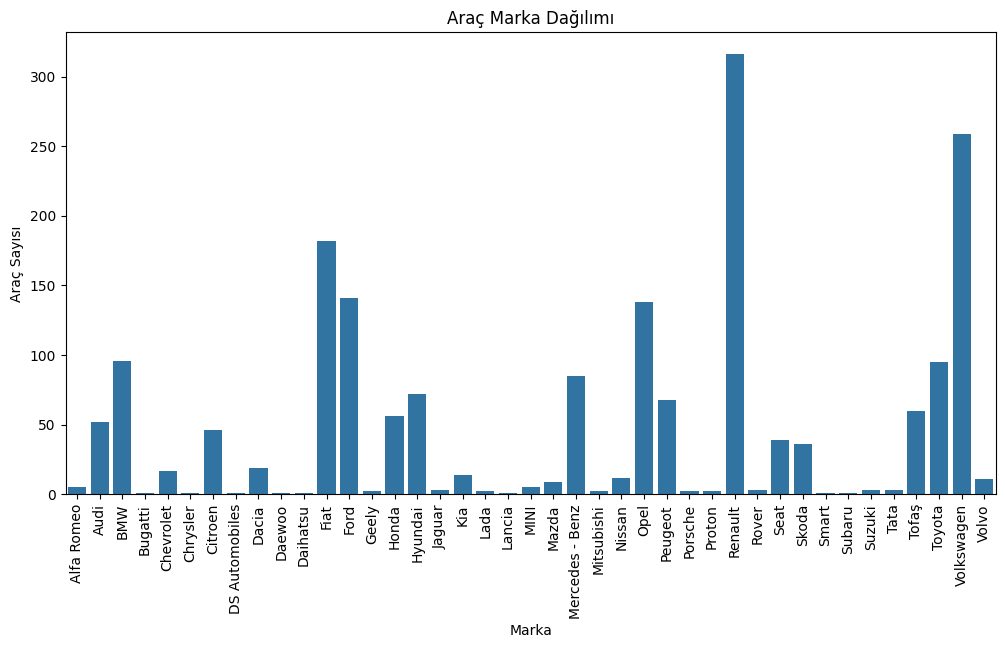

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Marka"].value_counts().index,y=df["Marka"].value_counts().values)
plt.xticks(rotation=90);
plt.xlabel("Marka")
plt.ylabel("Araç Sayısı")
plt.title("Araç Marka Dağılımı")
plt.show()

Marka Dağılımında Volskwagen, Renault ve Fiat markalarının başı çektiğini görüyoruz.

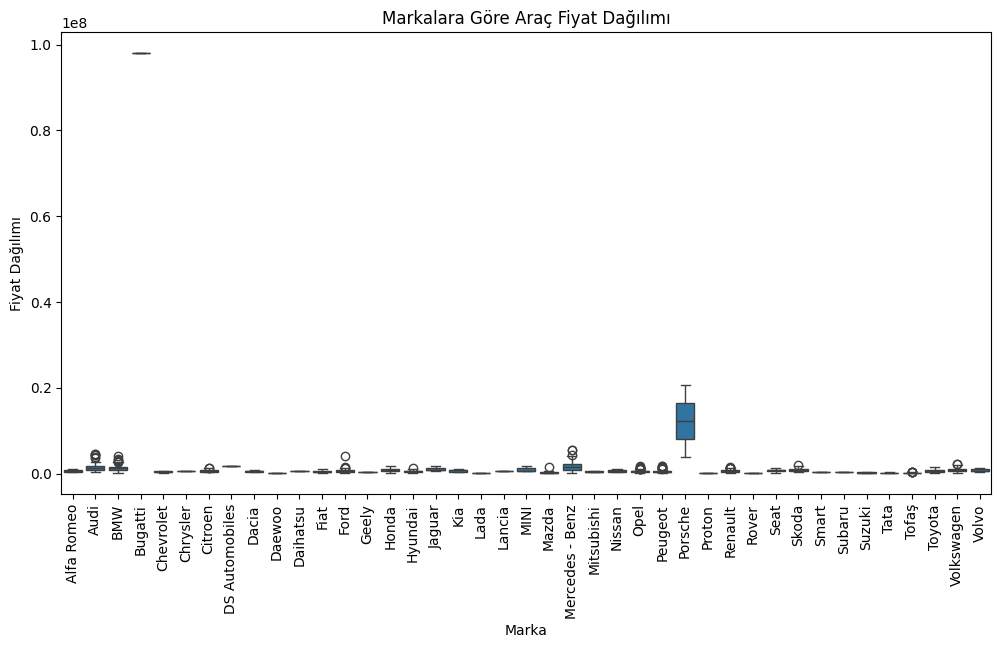

In [122]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Marka", y="Fiyat", data=df)
plt.xticks(rotation=90)
plt.xlabel("Marka")
plt.ylabel("Fiyat Dağılımı")
plt.title("Markalara Göre Araç Fiyat Dağılımı")
plt.show()

Buugatti gibi aşırı uçuk fiyatlı araçlar bizim modelimizin genel performansını bozacağından aykırı değerlerden kurtulmam gerekiyor.

In [123]:
Q1 = df['Fiyat'].quantile(0.25) #ıqr yöntemini kullanarak aykırı değerlerden kurtulacağım, bugatti gibi aşırı lüks araçların genel performansa zarar vereceğini 
Q3 = df['Fiyat'].quantile(0.75) #düşündüğümden aykırı değerlerden kurtulacağım.
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR


data_filtered = df[(df['Fiyat'] >= alt_sinir) & (df['Fiyat'] <= ust_sinir)]
df=data_filtered

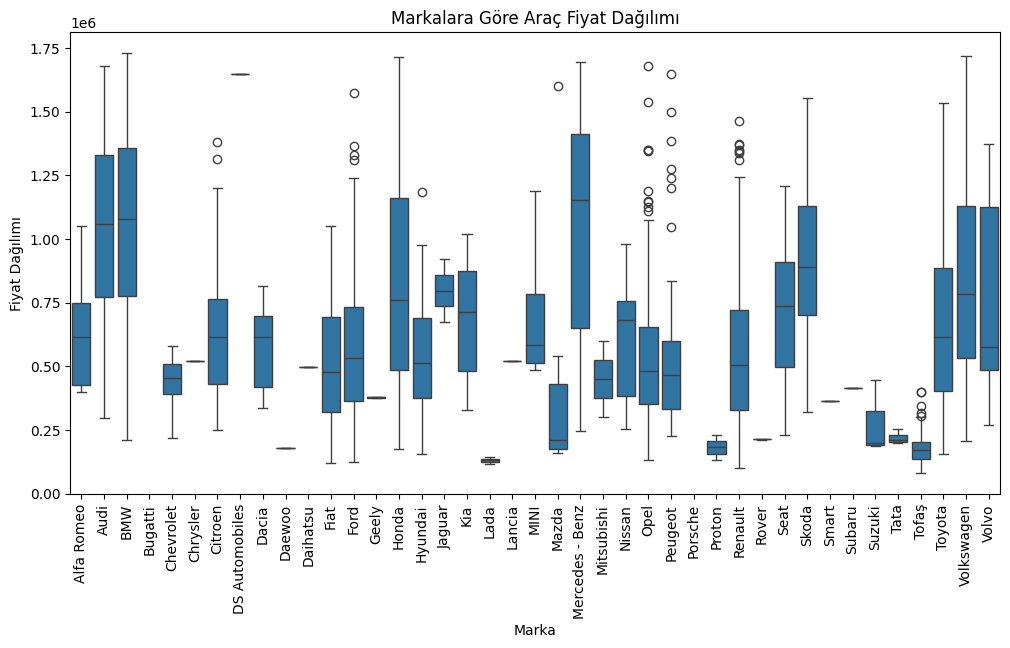

In [124]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Marka", y="Fiyat", data=df)
plt.xticks(rotation=90)
plt.xlabel("Marka")
plt.ylabel("Fiyat Dağılımı")
plt.title("Markalara Göre Araç Fiyat Dağılımı")
plt.show()

Artık çok daha sağlıklı bir verisetine sahibiz.

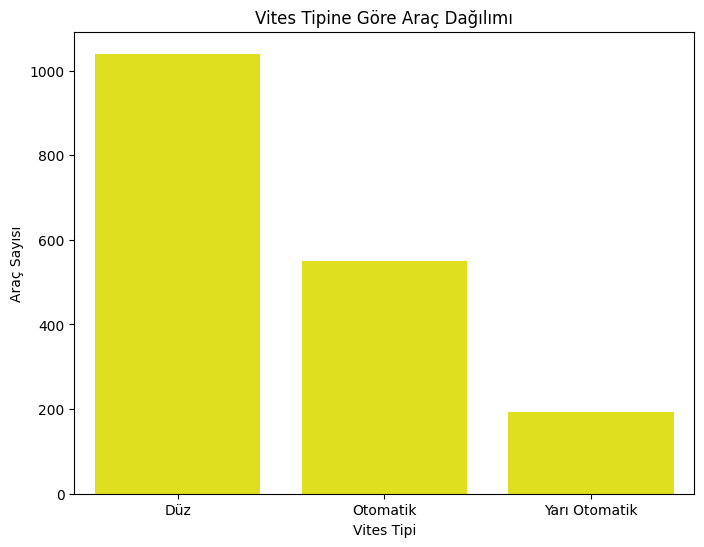

In [125]:
plt.figure(figsize=(8,6))
sns.countplot(x="Vites Tipi", data=df,color='Yellow') 
plt.xlabel("Vites Tipi")
plt.ylabel("Araç Sayısı")
plt.title("Vites Tipine Göre Araç Dağılımı")
plt.show()

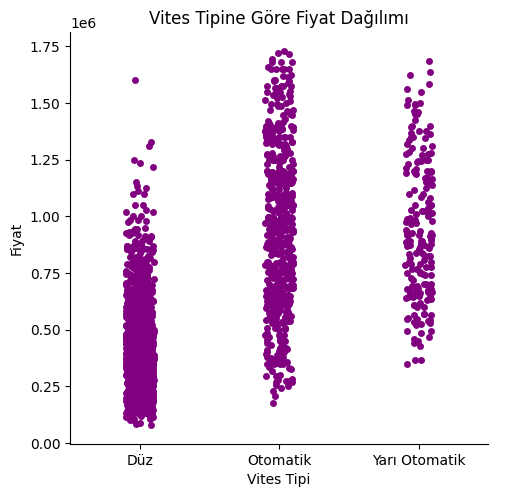

In [126]:
sns.catplot(x="Vites Tipi",y="Fiyat",data=df,color="Purple");
plt.xlabel("Vites Tipi")
plt.ylabel("Fiyat")
plt.title("Vites Tipine Göre Fiyat Dağılımı")
plt.show()

Otomatik ve yarı otomatik  tipi araçların genel olarak daha pahalı olduğu kanısına varabiliriz. 

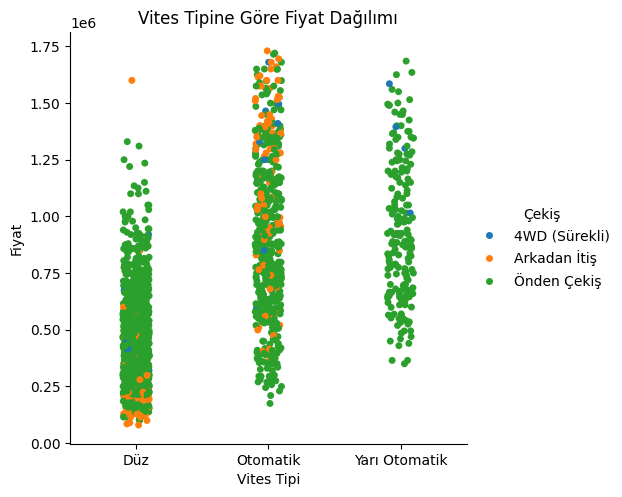

In [127]:
sns.catplot(x="Vites Tipi",y="Fiyat",hue="Çekiş",data=df); #Çekiş feauture'na göre bir kırılım gerçekleştirelim.
plt.xlabel("Vites Tipi")
plt.ylabel("Fiyat")
plt.title("Vites Tipine Göre Fiyat Dağılımı")
plt.show()

Şöyle bir göz attığımızda;
Düz vites tipinde arkadan itişli araçların fiyatlarının, önden çekişliye kıyasla daha düşük olduğu göze çarpıyor.
Otomatik vites tipinde ise yüksek fiyat aralığında arkadan itiş yoğunluğunda artış gözleniyor. 4WD çekişli arabalar ise az var ve yüksek fiyatl aralığında gözlemleniyor.
Yarı otomatik vites tipinde ise taban fiyatı daha yüksek ve önden çekiş yoğunluklu, neredeyse hiç arkadan çekiş yok.
Bu çıkarımların yanı sıra veri setimizde en çok önden çekişli araç bulunduğunu, sonra arkadan itiş ondan sonra da 4WD çekişli arabalar olduğunu görebiliyoruz.


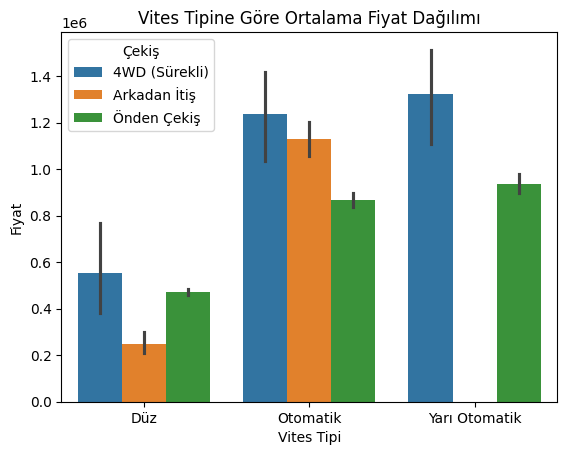

In [128]:
sns.barplot(x="Vites Tipi", y="Fiyat", hue="Çekiş", data=df);
plt.xlabel("Vites Tipi")
plt.ylabel("Fiyat")
plt.title("Vites Tipine Göre Ortalama Fiyat Dağılımı")
plt.show()

Yukarıda yaptığımız fiyat çıkarımlarını çaprazlanmış barplot ile daha rahat bir şekilde gözlemleyebiliriz.

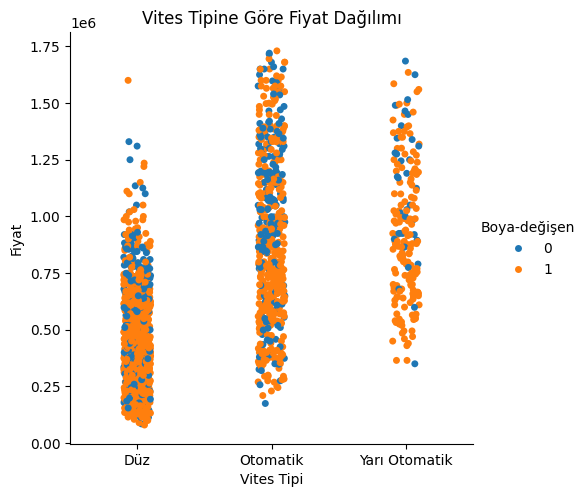

In [129]:
sns.catplot(x="Vites Tipi",y="Fiyat",hue="Boya-değişen",data=df); #Çekiş feauture'na göre bir kırılım gerçekleştirelim.
plt.xlabel("Vites Tipi")
plt.ylabel("Fiyat")
plt.title("Vites Tipine Göre Fiyat Dağılımı")
plt.show()

Aracın orijinal olduğu durumların yüksek fiyat aralıklarında daha yoğunlaştığını söyleyebiliriz.

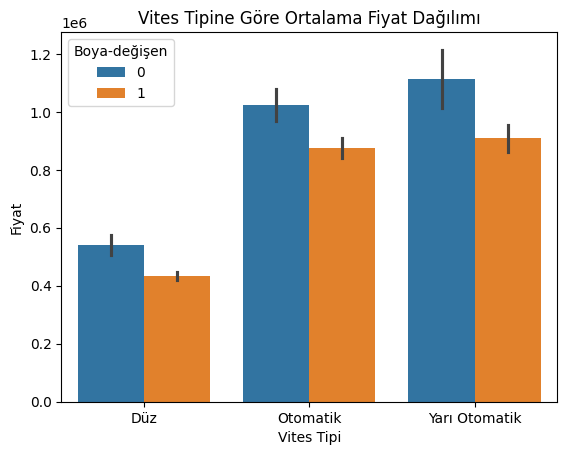

In [130]:
sns.barplot(x="Vites Tipi", y="Fiyat", hue="Boya-değişen", data=df);
plt.xlabel("Vites Tipi")
plt.ylabel("Fiyat")
plt.title("Vites Tipine Göre Ortalama Fiyat Dağılımı")
plt.show()

Her vites tipinde 'tamamen orjinal' araçların fiyat ortalamasının daha yüksek olduğunu görüyoruz.

In [131]:
df.groupby(["Vites Tipi","Boya-değişen"])["Fiyat"].mean() #Bu şekilde grafiğin doğruluğunu kontrol ediyoruz.

C:\Users\Onur Fidan\AppData\Local\Temp\ipykernel_17404\375807309.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Vites Tipi","Boya-değişen"])["Fiyat"].mean() #Bu şekilde grafiğin doğruluğunu kontrol ediyoruz.


Vites Tipi     Boya-değişen
Düz            0               5.399196e+05
               1               4.322167e+05
Otomatik       0               1.022659e+06
               1               8.737878e+05
Yarı Otomatik  0               1.113183e+06
               1               9.084568e+05
Name: Fiyat, dtype: float64

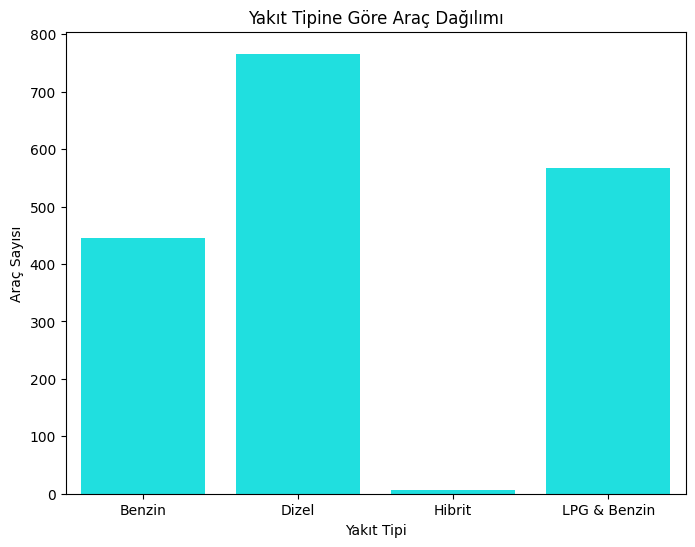

In [132]:
plt.figure(figsize=(8,6))
sns.countplot(x="Yakıt Tipi", data=df,color='Cyan') 
plt.xlabel("Yakıt Tipi")
plt.ylabel("Araç Sayısı")
plt.title("Yakıt Tipine Göre Araç Dağılımı")
plt.show()

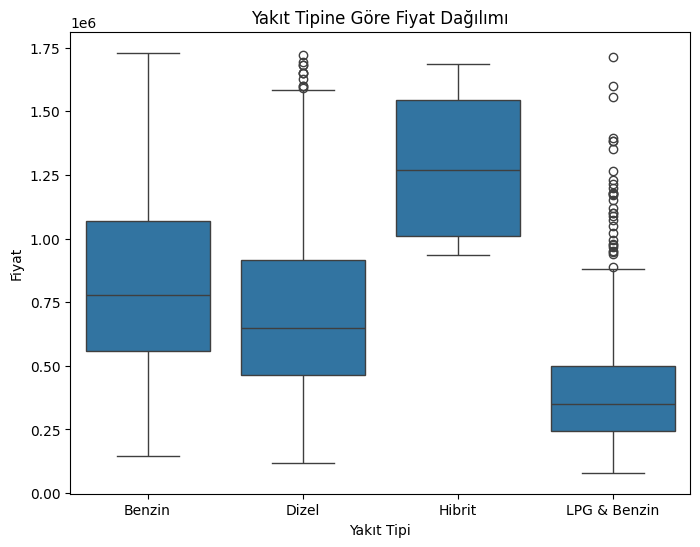

In [133]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Yakıt Tipi",y="Fiyat",data=df);
plt.xlabel("Yakıt Tipi")
plt.ylabel("Fiyat")
plt.title("Yakıt Tipine Göre Fiyat Dağılımı")
plt.show()

Hibrit araçların en pahalı aralığı oluşturduğunu, en ucuzu da LPG & Benzin tipi araçlar olduğunu görüyoruz.

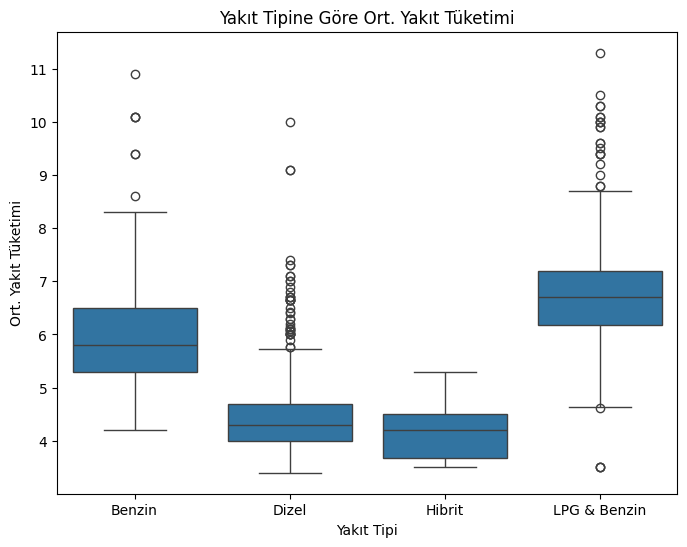

In [134]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Yakıt Tipi",y="Ort. Yakıt Tüketimi",data=df);
plt.xlabel("Yakıt Tipi")
plt.ylabel("Ort. Yakıt Tüketimi")
plt.title("Yakıt Tipine Göre Ort. Yakıt Tüketimi")
plt.show()

En fazla yakıt tüketiminin LPG & Benzin yakıt tipi araçlarda olduğunu görüyoruz, onu da Benzin takip ediyor. En az ise Hibrit modeller.

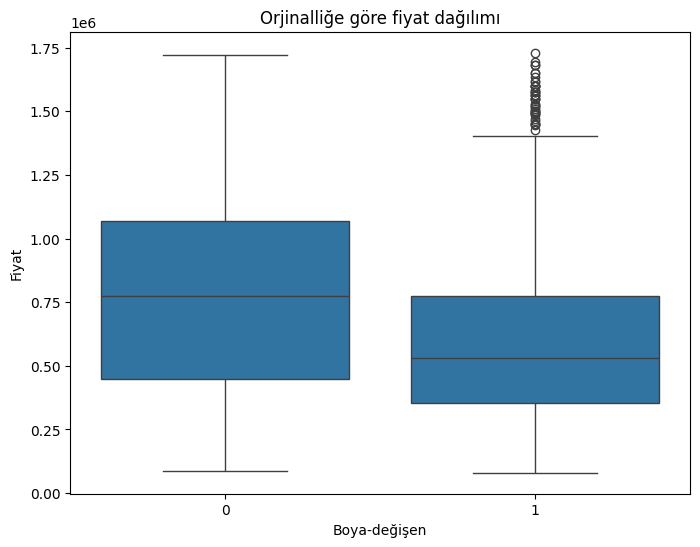

In [135]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Boya-değişen",y="Fiyat",data=df);
plt.xlabel("Boya-değişen")
plt.ylabel("Fiyat")
plt.title("Orjinalliğe göre fiyat dağılımı")
plt.show()

Orjinal araçların, parça veya boya değişimi yaşamış araçlara göre fiyatlarının daha fazla olduğunu görüyoruz. Eğer biz bunu marka model bazına indirirsek aradaki farkın daha da açıldığını görebiliriz.

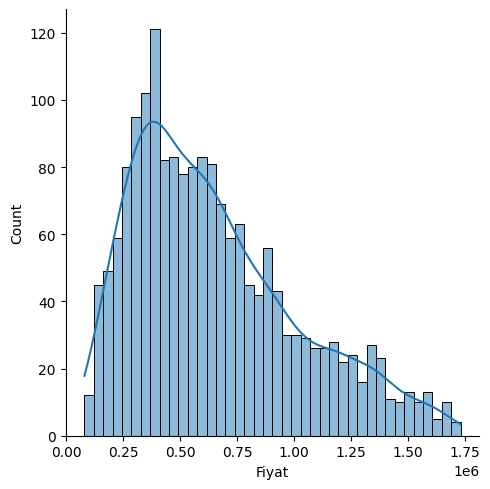

In [136]:
sns.displot(df.Fiyat,bins=40,kde=True)
plt.show()

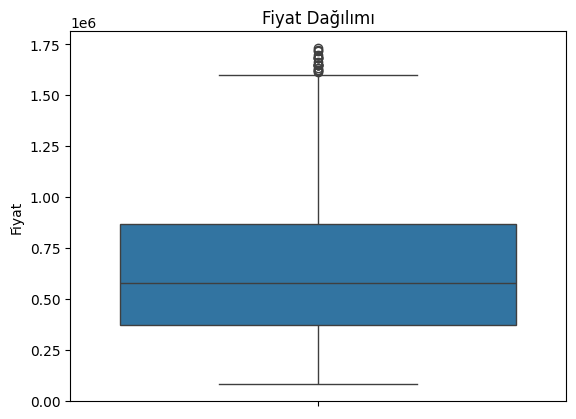

In [137]:
plt.title('Fiyat Dağılımı')
sns.boxplot(y=df["Fiyat"])
plt.show()

In [138]:
df.Fiyat.describe()

count    1.784000e+03
mean     6.515762e+05
std      3.634858e+05
min      8.000000e+04
25%      3.700000e+05
50%      5.750000e+05
75%      8.672500e+05
max      1.730000e+06
Name: Fiyat, dtype: float64

Maksimum değere bakarsak grafikle eşleşiyor, bu şekilde grafiğimizi doğrulamış oluyoruz.

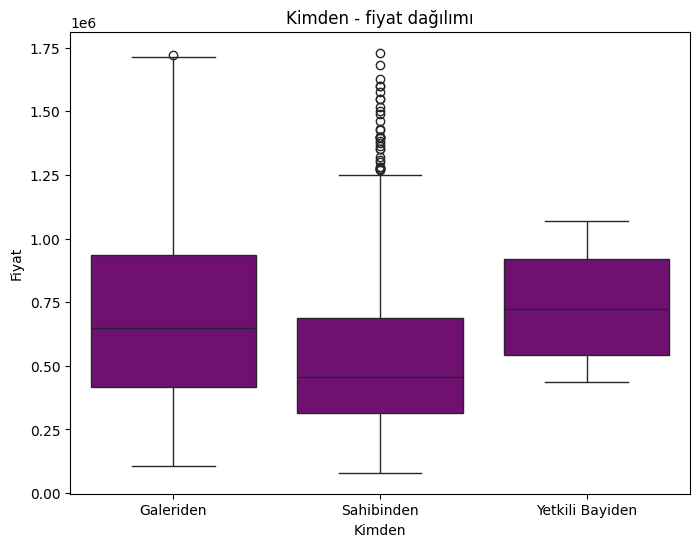

In [139]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Kimden",y="Fiyat",data=df,color="Purple");
plt.xlabel("Kimden")
plt.ylabel("Fiyat")
plt.title("Kimden - fiyat dağılımı")
plt.show()

Yetkili bayiden alınan arabaların daha pahalı olduğunu görüyoruz; ardından galeri, daha sonrasında Sahibinden

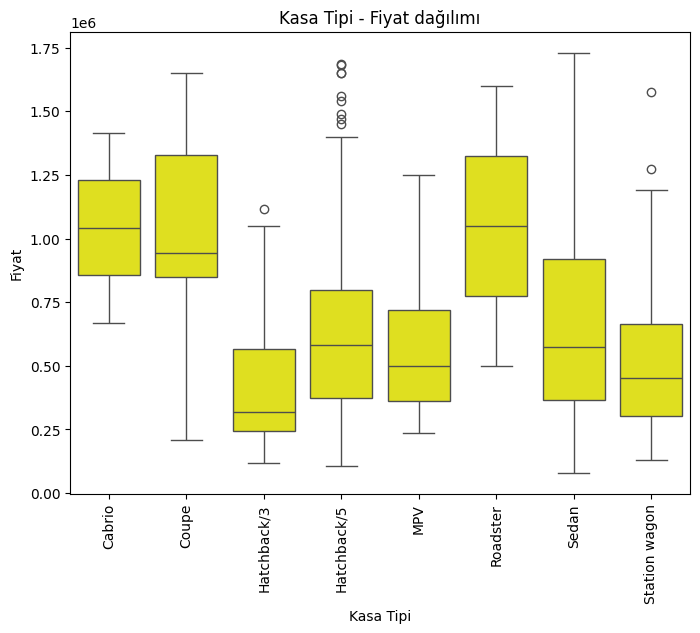

In [140]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Kasa Tipi",y="Fiyat",data=df,color="Yellow");
plt.xlabel("Kasa Tipi")
plt.ylabel("Fiyat")
plt.title("Kasa Tipi - Fiyat dağılımı")
plt.xticks(rotation=90)
plt.show()

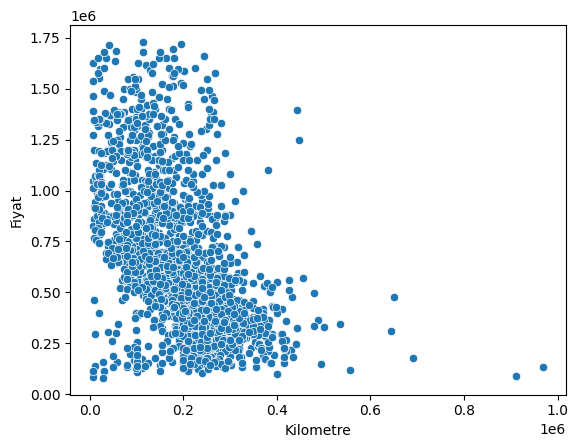

In [141]:
sns.scatterplot(x="Kilometre",y="Fiyat",data=df);

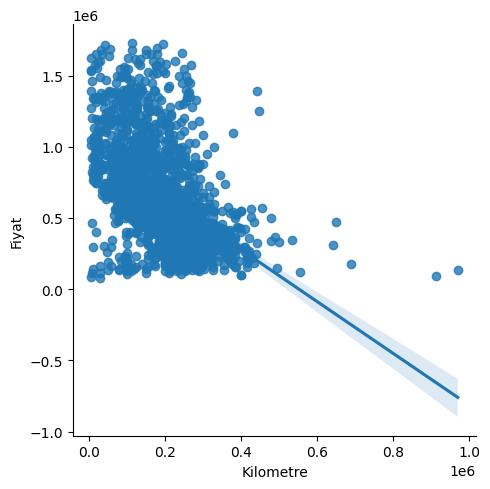

In [142]:
sns.lmplot(x="Kilometre",y="Fiyat",data=df);

Fiyat ve Kilometre arasında çok net bir negatif korelasyon olduğunu görüyoruz.

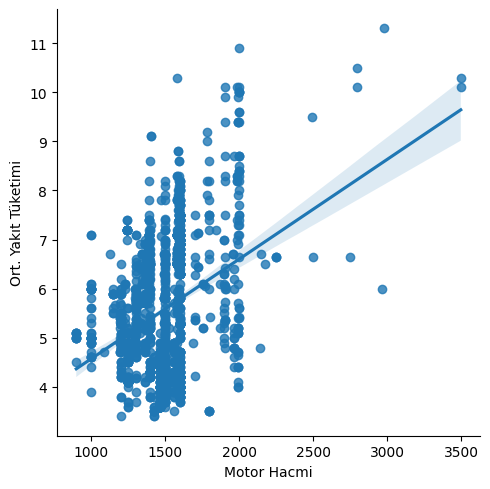

In [143]:
sns.lmplot(x="Motor Hacmi",y="Ort. Yakıt Tüketimi",data=df);

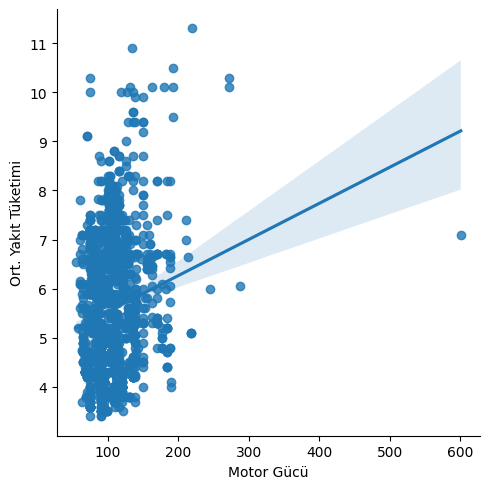

In [144]:
sns.lmplot(x="Motor Gücü",y="Ort. Yakıt Tüketimi",data=df);

In [145]:
cols = ['Yaş', 'Kilometre', 'Motor Hacmi', 'Motor Gücü', 
        'Ort. Yakıt Tüketimi', 'Yakıt Deposu']

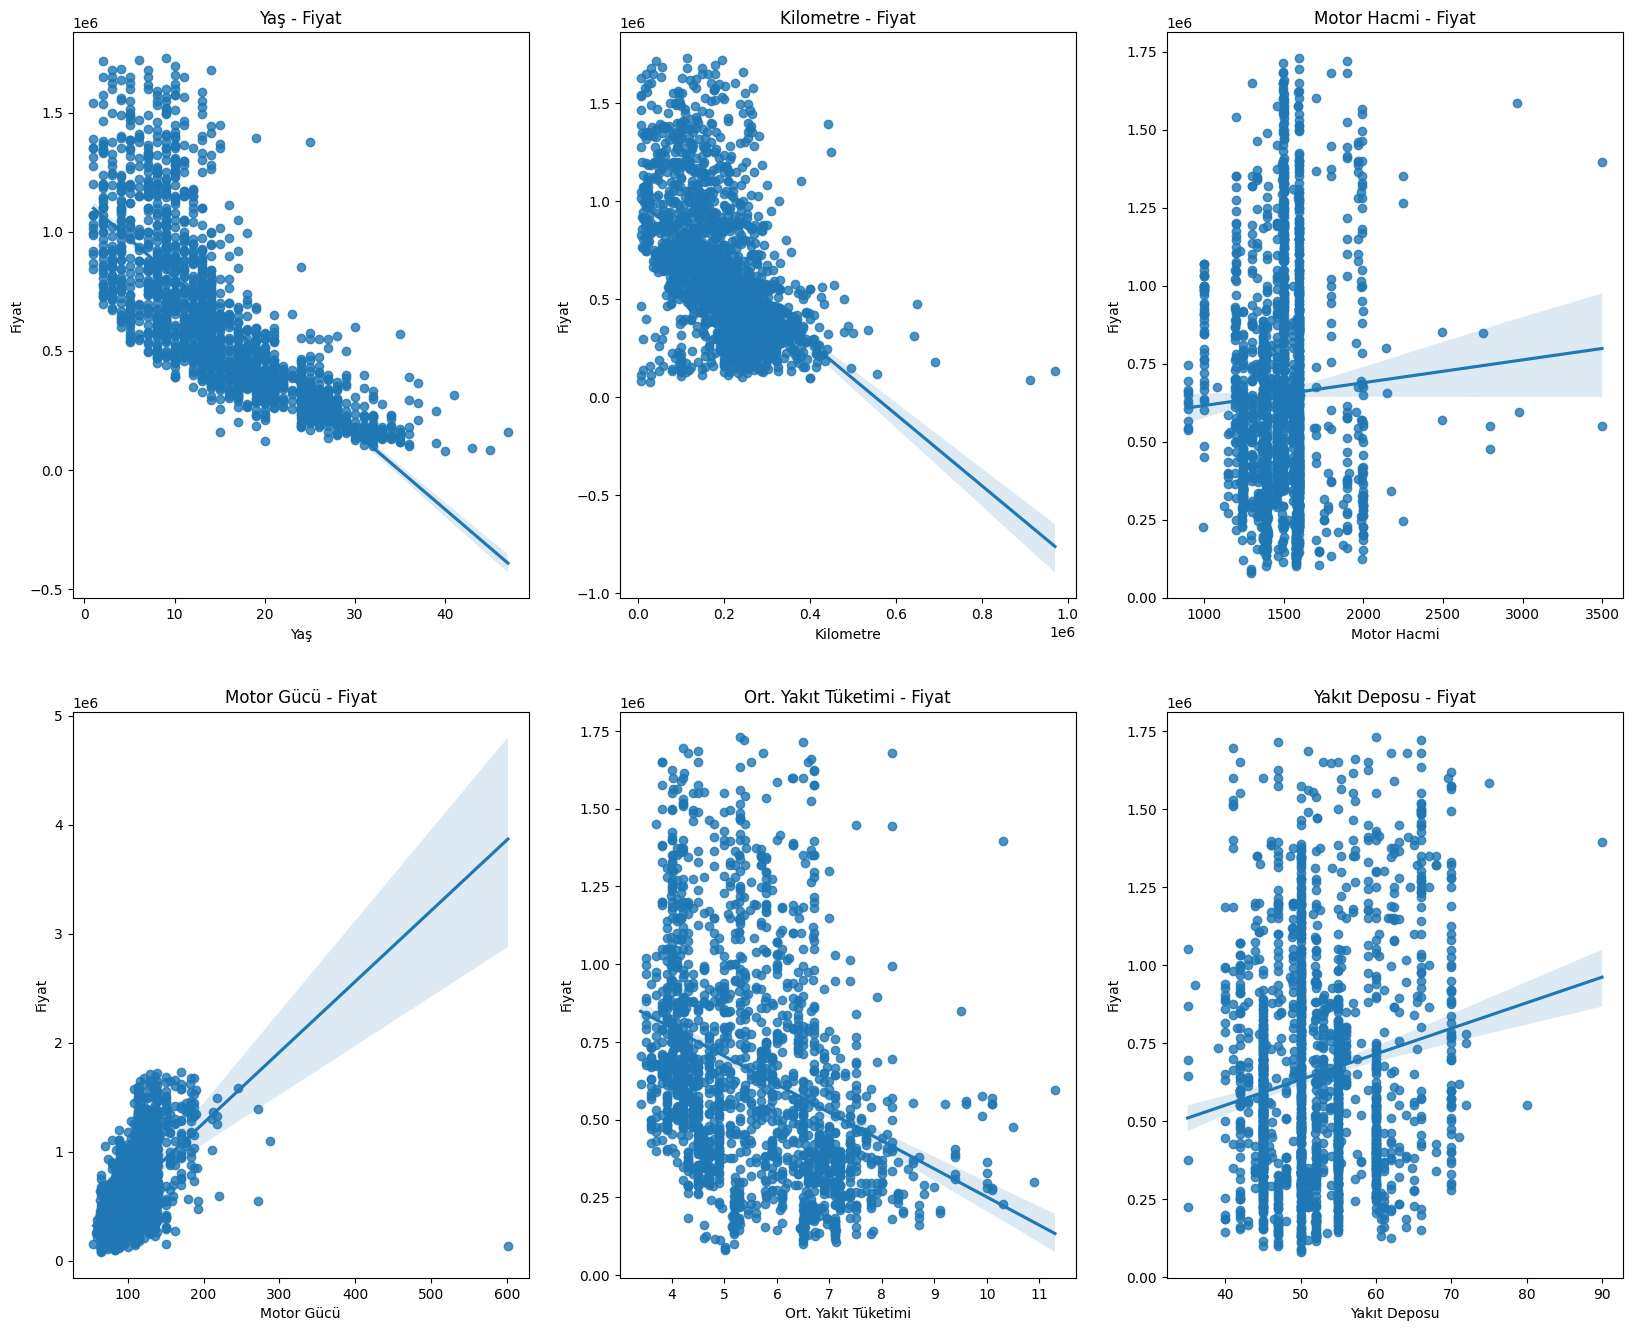

In [146]:
plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.regplot(x=df[cols[i]], y=df.Fiyat)

Burada her değişkenin bizim için değerli olduğunu, fiyat üzerinde etkisi olduğunu görüyoruz.

In [147]:
df_copy=df.copy()
df_copy["Boya-değişen"]=df_copy["Boya-değişen"].astype('category')

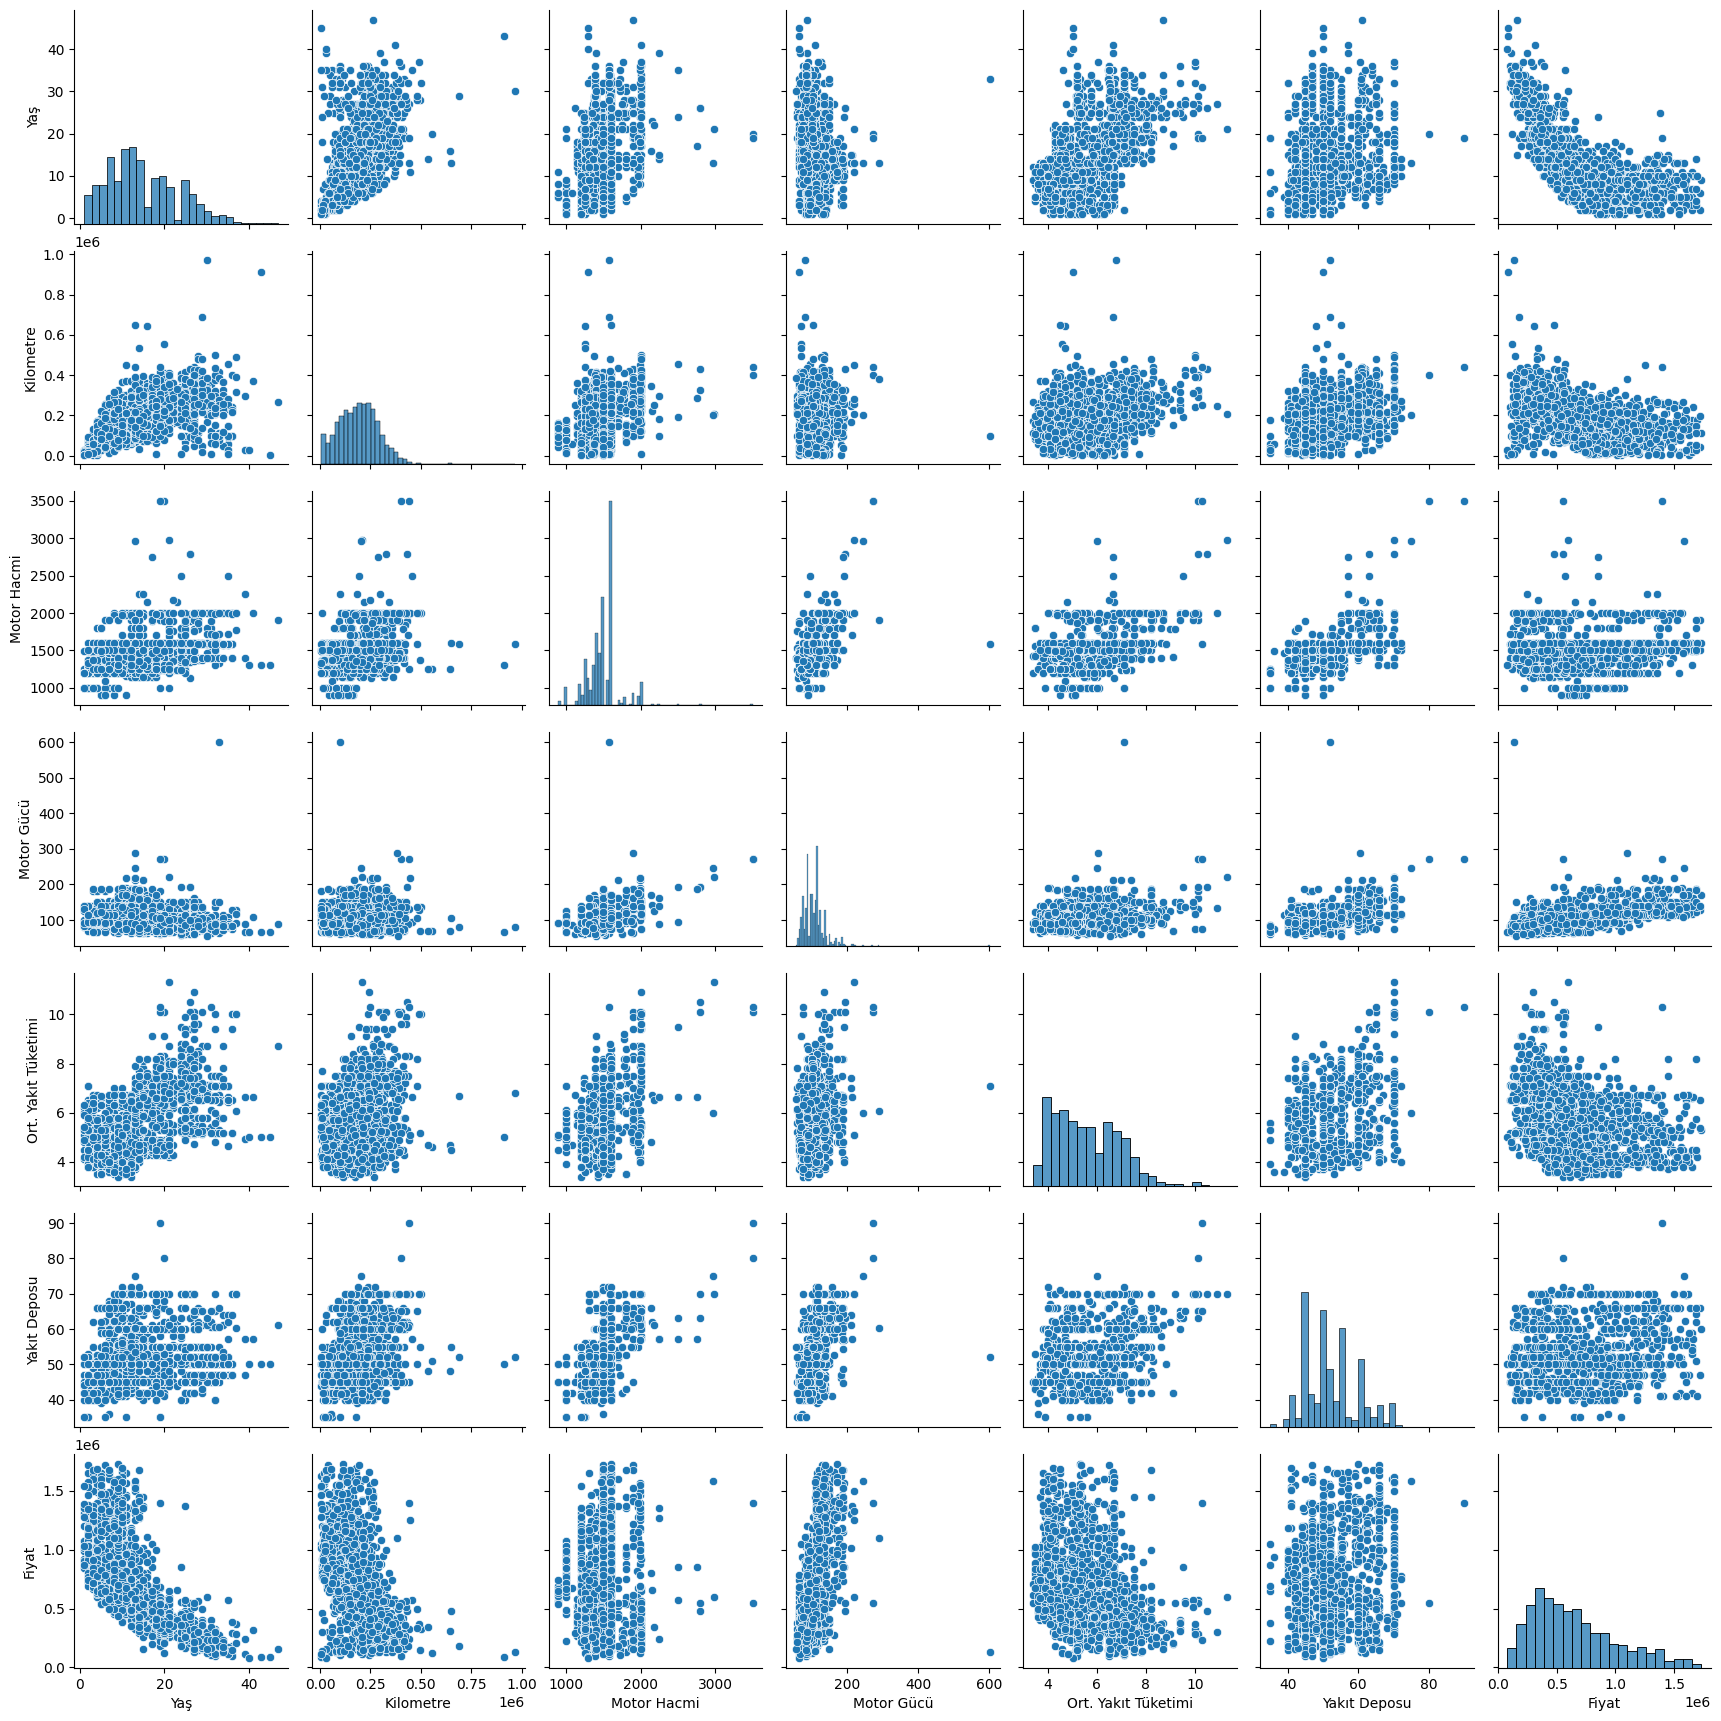

In [148]:
sns.pairplot(df_copy);

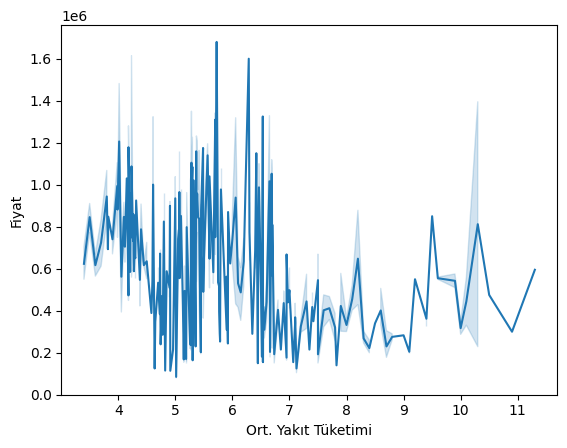

In [149]:
sns.lineplot(x="Ort. Yakıt Tüketimi",y="Fiyat",data=df);

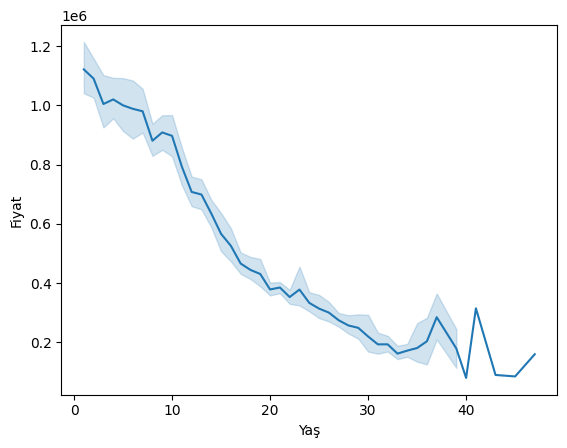

In [150]:
sns.lineplot(x="Yaş",y="Fiyat",data=df);

*****Model Eğitimi (Training Model)*****

Modelimizin kategorik değişkenleri anlayıp yorumlayabilimesi için one-hot encoding yöntemini kullanacağım.

In [151]:
dummies_list=df.select_dtypes(include=["category"]).columns.tolist()
dummies_list

['Marka',
 'Seri',
 'Model',
 'Vites Tipi',
 'Yakıt Tipi',
 'Kasa Tipi',
 'Renk',
 'Çekiş',
 'Kimden']

In [152]:
df_encoded = pd.get_dummies(df, columns=dummies_list, drop_first=True)

In [153]:
df_encoded.head()

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Fiyat,Marka_Audi,Marka_BMW,...,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil,Renk_Şampanya,Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Kimden_Sahibinden,Kimden_Yetkili Bayiden
0,7,150000.0,1461.0,90.0,3.9,50.0,1,530000.0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,323000.0,1598.0,75.0,7.2,52.0,1,319000.0,False,False,...,False,True,False,False,False,False,False,True,False,False
2,28,390000.0,1587.0,105.0,7.1,50.0,1,295000.0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,24,408000.0,1598.0,107.0,7.0,60.0,1,295000.0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2,72651.0,1598.0,120.0,3.9,45.0,1,919000.0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [154]:
x = df_encoded.drop(columns=["Fiyat"])  
y = df_encoded["Fiyat"]

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [156]:
x_train.head()

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Marka_Audi,Marka_BMW,Marka_Bugatti,...,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil,Renk_Şampanya,Çekiş_Arkadan İtiş,Çekiş_Önden Çekiş,Kimden_Sahibinden,Kimden_Yetkili Bayiden
1365,17,190000.0,1198.0,70.0,5.900000,45.000000,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
183,7,183000.0,1500.5,88.0,4.117647,53.941176,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
931,14,183000.0,1598.0,105.0,4.700000,55.000000,1,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1703,1,26537.0,1197.0,84.0,4.900000,35.000000,0,False,False,False,...,False,False,False,False,False,False,False,True,False,True
505,15,106000.0,1388.0,96.0,6.500000,42.000000,1,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [157]:
y_train.head()

1365    399000.0
183     755000.0
931     665000.0
1703    867000.0
505     599000.0
Name: Fiyat, dtype: float64

In [158]:
scaler = StandardScaler()     #Değişken boyutlarının farklı olması bir sorundur. Bunun için hepsi kendi içinde boyutlandırılır.
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 

In [159]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [160]:
results=[]

In [161]:
for name, model in models.items():
    
    if name in ["Support Vector Regression", "Neural Network (MLP)"]:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append((name, mae, mse, r2))

c:\Users\Onur Fidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.798e+12, tolerance: 1.878e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Onur Fidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [162]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R²"])

In [163]:
results_df = results_df.sort_values(by="R²", ascending=False)

In [164]:
results_df

,Model,MAE,MSE,R²
1,Ridge Regression,84312.212235,1.250643e+10,0.906220
7,XGBoost,77911.958859,1.263587e+10,0.905249
0,Linear Regression,89349.041588,1.488943e+10,0.888351
4,Random Forest,85768.180300,1.519529e+10,0.886058
2,Lasso Regression,91569.940394,1.572775e+10,0.882065
3,Decision Tree,118958.971989,3.075943e+10,0.769349
6,Neural Network (MLP),136453.842736,3.571740e+10,0.732172
5,Support Vector Regression,289480.925393,1.432909e+11,-0.074472


Şimdi de özelliklerin fiyat üzerindeki etkilerine bakalım:

In [165]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)  
rf.fit(x_train, y_train)  


feature_importances = pd.DataFrame({
    "Feature": x.columns,  
    "Importance": rf.feature_importances_  
})


feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

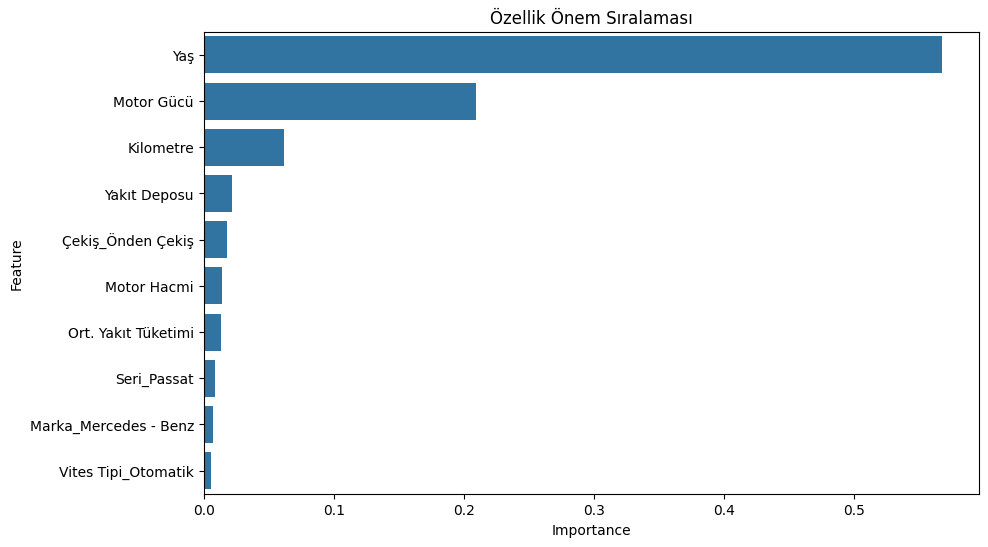

In [166]:
plt.figure(figsize=(10, 6))  
sns.barplot(x="Importance", y="Feature", data=feature_importances[:10])  
plt.title("Özellik Önem Sıralaması")  
plt.show() 

**Manuel olarak dışarıdan girilen aracın fiyat tahmini**

In [167]:
new_data = pd.DataFrame({
    "Marka":"Fiat",
    "Seri": "Egea",
    "Model":"1.3 Multijet Easy",
    "Yaş":8 ,
    "Kilometre":183000.0,
    "Vites Tipi":"Düz",
    "Yakıt Tipi":"Dizel",
    "Kasa Tipi":"Sedan",
    "Renk":"Beyaz",
    "Motor Hacmi":1248.0,
    "Motor Gücü":95.0 ,
    "Çekiş":"Önden Çekiş",
    "Ort. Yakıt Tüketimi":4.1,
    "Yakıt Deposu":45,
    "Boya-değişen":1,
    "Kimden": "Galeriden"
},index=[0])



In [168]:
new_data["Model"]=new_data["Model"].str.lower()

In [169]:
new_data = new_data.astype({col: 'category' for col in new_data.select_dtypes(include=['object']).columns})

In [170]:
dummies_list=new_data.select_dtypes(include=["category"]).columns.tolist()
dummies_list

['Marka',
 'Seri',
 'Model',
 'Vites Tipi',
 'Yakıt Tipi',
 'Kasa Tipi',
 'Renk',
 'Çekiş',
 'Kimden']

In [171]:
data_encoded = pd.get_dummies(new_data, columns=dummies_list, drop_first=True)

In [ ]:
columns = model.feature_names_in_
missing_cols = [col for col in columns if col not in data_encoded.columns]

for col in missing_cols:
    data_encoded[col] = 0

data_encoded =data_encoded[columns]

In [173]:
predicted_price = model.predict(data_encoded)
predicted_price

array([663580.56], dtype=float32)

Aracımızın gerçek fiyatı 605000 TL. Bu da yaklaşık olarak %9.5 oranında bir sapma demek. Amacımız genel bir fiyat tahmini olduğu için sonuç makul diyebiliriz. Fakat fiyatı daha da iyileştirip daha keskin tahminler yapan bir model istiyorsak modeli iyileştirmemiz gerekli.

***Projenin Sonu***

Bu projeyi bir internet sitesi üzerinden çektiğim veri üzerinden yaptığımdan dolayı veri setinin dağılımı çok iyi değildi.
Bu çok iyi olmayan veriyi maksimum performans almak için elimden geldiğince temizledim, işledim ve iyileştirdim. Sonuç olarak 
0.9luk bir R^2 skoru elde edebildim.Veri setinin durumunu da göz önünde bulundurursak fena bir oran olmadığını düşünüyorum.
Bu projede amacımız zaten sınırlı veriyle genel bir tahminde bulunan bir modeli, sınırlı veriden maksimum performans alacak şekilde geliştirmekti. 
Eğer çok daha keskin bir fiyat tahmini yapabilen bir model istiyorsak, modelimizi iyileştirmeliyiz